In [1]:
import pickle
import os

#os.environ["CUDA_VISIBLE_DEVICES"] = "1"
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

# 改变当前目录
new_directory = '/remote-home/xiaoyili/MASTER-master'
os.chdir(new_directory)
print("当前工作目录:", os.getcwd())

当前工作目录: /remote-home/xiaoyili/MASTER-master


# 一、市场信息和评论数据相关性分析

## 1.1 读取数据

In [2]:
import pandas as pd

# 读取市场信息数据
market_info = pd.read_csv('/remote-home/xiaoyili/MASTER-master/data/csi_market_information.csv')

# 读取评论数据
comments = pd.read_csv('/remote-home/xiaoyili/MASTER-master/data/stock_comments_raw.csv')

In [3]:
market_info

,Unnamed: 0,feature,feature.1,feature.2,feature.3,feature.4,feature.5,feature.6,feature.7,feature.8,...,feature.53,feature.54,feature.55,feature.56,feature.57,feature.58,feature.59,feature.60,feature.61,feature.62
0,NaN,"Mask($close/Ref($close,1)-1,'SH000300')","Mask(Mean($close/Ref($close,1)-1,5),'SH000300')","Mask(Std($close/Ref($close,1)-1,5),'SH000300')","Mask(Mean($amount,5)/$amount,'SH000300')","Mask(Std($amount,5)/$amount,'SH000300')","Mask(Mean($close/Ref($close,1)-1,10),'SH000300')","Mask(Std($close/Ref($close,1)-1,10),'SH000300')","Mask(Mean($amount,10)/$amount,'SH000300')","Mask(Std($amount,10)/$amount,'SH000300')",...,"Mask(Mean($amount,20)/$amount,'SH000906')","Mask(Std($amount,20)/$amount,'SH000906')","Mask(Mean($close/Ref($close,1)-1,30),'SH000906')","Mask(Std($close/Ref($close,1)-1,30),'SH000906')","Mask(Mean($amount,30)/$amount,'SH000906')","Mask(Std($amount,30)/$amount,'SH000906')","Mask(Mean($close/Ref($close,1)-1,60),'SH000906')","Mask(Std($close/Ref($close,1)-1,60),'SH000906')","Mask(Mean($amount,60)/$amount,'SH000906')","Mask(Std($amount,60)/$amount,'SH000906')"
1,datetime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2008-01-02,0.74735785,1.0109634,-0.3857283,-0.48744312,-0.41647258,2.3384879,-0.2932096,-1.0209479,0.3737961,...,-1.1782714,-0.073501915,1.1677352,0.9706462,-1.2811788,-0.2686496,-0.26966769,1.1301857,-0.861093,-0.094856545
3,2008-01-03,0.57677513,1.1709653,-0.44583988,-1.510427,-0.07144575,2.631894,-0.535334,-1.7701427,-0.1408315,...,-1.7292851,-0.42073408,1.1029062,0.956888,-1.7333093,-0.53866225,-0.2325726,1.1363155,-1.3474478,-0.6344719
4,2008-01-04,0.9783356,1.2388867,-0.4253297,-0.5109146,-0.16768292,2.3329468,-0.71679527,-1.0881703,0.094598696,...,-1.252471,0.052661605,1.4073274,0.9138765,-1.3976433,-0.04842961,-0.14936003,1.1450477,-1.0922279,-0.3407097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3662,2022-12-26,0.3210869,-0.48046714,-0.56422186,-0.25225753,-0.3497873,-0.76427525,-0.87842554,0.31528723,-0.33097595,...,1.2873809,1.8907441,0.0017441438,-0.6483837,1.0917803,0.91083205,0.122111104,-0.3669811,0.9489612,0.31291187
3663,2022-12-27,0.9942816,0.4167808,-0.9956755,-0.4722232,-0.5975786,-0.44711968,-0.6582216,0.101582885,-0.45521325,...,0.9504506,1.6254094,-0.2900676,-0.7512487,0.8373901,0.68266475,-0.051829048,-0.39930776,0.7980356,0.22041091
3664,2022-12-28,-0.41465405,0.26749828,-0.8562651,-0.49871466,-0.98052764,-0.6020983,-0.6698416,-0.27127165,-0.87580276,...,1.226295,2.0154533,-0.23380738,-0.76492125,1.1169877,1.0260067,0.08404417,-0.44879085,1.0940301,0.46747857
3665,2022-12-29,-0.3696473,0.10122397,-0.7722039,-0.18370587,-1.0912828,-0.67323667,-0.66988677,-0.014053509,-0.928241,...,1.2253428,1.887248,-0.16119136,-0.7628109,1.2258965,1.2596909,0.11366528,-0.44755015,1.2404969,0.6129586


### market_info字段处理

In [4]:
# 读取第一行的值，设为列名
new_columns = market_info.iloc[0]
market_info.columns = new_columns
# 假设第一列是日期列，其余列是特征列
market_info.rename(columns={market_info.columns[0]: 'datetime'}, inplace=True)
# 删除第1、2行数据
market_info = market_info[2:]
# 重置索引
market_info.reset_index(drop=True, inplace=True)

In [5]:
market_info

,datetime,"Mask($close/Ref($close,1)-1,'SH000300')","Mask(Mean($close/Ref($close,1)-1,5),'SH000300')","Mask(Std($close/Ref($close,1)-1,5),'SH000300')","Mask(Mean($amount,5)/$amount,'SH000300')","Mask(Std($amount,5)/$amount,'SH000300')","Mask(Mean($close/Ref($close,1)-1,10),'SH000300')","Mask(Std($close/Ref($close,1)-1,10),'SH000300')","Mask(Mean($amount,10)/$amount,'SH000300')","Mask(Std($amount,10)/$amount,'SH000300')",...,"Mask(Mean($amount,20)/$amount,'SH000906')","Mask(Std($amount,20)/$amount,'SH000906')","Mask(Mean($close/Ref($close,1)-1,30),'SH000906')","Mask(Std($close/Ref($close,1)-1,30),'SH000906')","Mask(Mean($amount,30)/$amount,'SH000906')","Mask(Std($amount,30)/$amount,'SH000906')","Mask(Mean($close/Ref($close,1)-1,60),'SH000906')","Mask(Std($close/Ref($close,1)-1,60),'SH000906')","Mask(Mean($amount,60)/$amount,'SH000906')","Mask(Std($amount,60)/$amount,'SH000906')"
0,2008-01-02,0.74735785,1.0109634,-0.3857283,-0.48744312,-0.41647258,2.3384879,-0.2932096,-1.0209479,0.3737961,...,-1.1782714,-0.073501915,1.1677352,0.9706462,-1.2811788,-0.2686496,-0.26966769,1.1301857,-0.861093,-0.094856545
1,2008-01-03,0.57677513,1.1709653,-0.44583988,-1.510427,-0.07144575,2.631894,-0.535334,-1.7701427,-0.1408315,...,-1.7292851,-0.42073408,1.1029062,0.956888,-1.7333093,-0.53866225,-0.2325726,1.1363155,-1.3474478,-0.6344719
2,2008-01-04,0.9783356,1.2388867,-0.4253297,-0.5109146,-0.16768292,2.3329468,-0.71679527,-1.0881703,0.094598696,...,-1.252471,0.052661605,1.4073274,0.9138765,-1.3976433,-0.04842961,-0.14936003,1.1450477,-1.0922279,-0.3407097
3,2008-01-07,1.1510324,1.0415094,-0.6731404,-0.57129955,-0.16017549,2.2137163,-0.7841609,-0.97937244,-0.27074593,...,-1.355161,-0.12065758,2.1728036,0.51743567,-1.495304,-0.108501434,-0.07355754,1.1614172,-1.2421621,-0.5302468
4,2008-01-08,-0.4920946,1.0515707,-0.69295084,-1.0655577,-0.36129647,1.7916951,-0.57964903,-1.39764,-0.4707964,...,-1.5684004,-0.2633972,1.8191961,0.53075415,-1.657388,-0.25629124,-0.08919736,1.164218,-1.4580234,-0.82055545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3660,2022-12-26,0.3210869,-0.48046714,-0.56422186,-0.25225753,-0.3497873,-0.76427525,-0.87842554,0.31528723,-0.33097595,...,1.2873809,1.8907441,0.0017441438,-0.6483837,1.0917803,0.91083205,0.122111104,-0.3669811,0.9489612,0.31291187
3661,2022-12-27,0.9942816,0.4167808,-0.9956755,-0.4722232,-0.5975786,-0.44711968,-0.6582216,0.101582885,-0.45521325,...,0.9504506,1.6254094,-0.2900676,-0.7512487,0.8373901,0.68266475,-0.051829048,-0.39930776,0.7980356,0.22041091
3662,2022-12-28,-0.41465405,0.26749828,-0.8562651,-0.49871466,-0.98052764,-0.6020983,-0.6698416,-0.27127165,-0.87580276,...,1.226295,2.0154533,-0.23380738,-0.76492125,1.1169877,1.0260067,0.08404417,-0.44879085,1.0940301,0.46747857
3663,2022-12-29,-0.3696473,0.10122397,-0.7722039,-0.18370587,-1.0912828,-0.67323667,-0.66988677,-0.014053509,-0.928241,...,1.2253428,1.887248,-0.16119136,-0.7628109,1.2258965,1.2596909,0.11366528,-0.44755015,1.2404969,0.6129586


### comments处理

In [4]:
# 删除不符合列要求的数据：存在空值、时间格式不正确的数据
from datetime import datetime

# 定义一个函数来检查是否为有效的日期
def is_valid_date(date_str):
    try:
        datetime.strptime(date_str, '%Y-%m-%d %H:%M:%S')
        return True
    except ValueError:
        return False

# 使用apply方法过滤掉无效的日期
comments['is_valid'] = comments['created_time'].apply(is_valid_date)
comments = comments[comments['is_valid']].drop(columns=['is_valid'])

In [28]:
comments

,created_time,title
0,2017-03-30 09:29:02,股市解散，都回家吧
1,2017-03-30 09:29:09,外围股市都是收涨的
2,2017-03-30 09:29:12,全球都在涨...悲催的中国股市...关门吧..坑死人的东西..！
3,2017-03-30 09:29:16,让我一次跌个狗[大笑][大笑][大笑]
4,2017-03-30 09:29:16,那什么去祭祖！
...,...,...
488459,2018-05-04 15:01:43,中国股市就是一潭死水 垃圾遍地 没有任何赚钱效应 这样的市场应该关掉
488460,2018-05-04 15:01:53,一月份指数连拉13阳是个笑话？？？
488461,2018-05-04 15:01:55,cnmd指数跌10点多股票跌nmd那么多，cnm就是赌博
488462,2018-05-04 15:01:57,死了人过头七这股市过


## 1.2 数据清洗

In [5]:
# 将市场信息数据的日期列转换为日期格式
market_info['datetime'] = pd.to_datetime(market_info['datetime'])

# 将评论数据的创建时间列转换为日期格式
comments['created_time'] = pd.to_datetime(comments['created_time'])
comments['date'] = comments['created_time'].dt.date

## 1.3 筛选数据

In [7]:
# 获取评论数据的时间范围
start_date = comments['date'].min()
end_date = comments['date'].max()

# 筛选市场指数数据(缩小时间范围)
market_info_filtered = market_info[(market_info['datetime'].dt.date >= start_date) & (market_info['datetime'].dt.date <= end_date)]

# 更改datetime为date
market_info_filtered['datetime'] = market_info_filtered['datetime'].dt.date
market_info_filtered.rename(columns={'datetime': 'date'}, inplace=True)

# 筛选之后仅仅只有267个数据（267个交易日）
print(market_info_filtered.shape)
print(market_info_filtered.head())
market_info_filtered.to_csv("market_info_filtered.csv")

(267, 64)
0           date Mask($close/Ref($close,1)-1,'SH000300')  \
2247  2017-03-30                              -0.7656782   
2248  2017-03-31                              0.46574813   
2249  2017-04-05                               1.1994122   
2250  2017-04-06                              0.22384934   
2251  2017-04-07                             0.052257363   

0    Mask(Mean($close/Ref($close,1)-1,5),'SH000300')  \
2247                                     -0.30537167   
2248                                     -0.38110697   
2249                                      0.16803892   
2250                                      0.33651087   
2251                                      0.41020685   

0    Mask(Std($close/Ref($close,1)-1,5),'SH000300')  \
2247                                    -0.89344203   
2248                                     -1.0316759   
2249                                     -0.5087687   
2250                                    -0.55068326   
2251             

/tmp/ipykernel_1819/4093794127.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_info_filtered['datetime'] = market_info_filtered['datetime'].dt.date
/tmp/ipykernel_1819/4093794127.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  market_info_filtered.rename(columns={'datetime': 'date'}, inplace=True)


In [6]:
market_info_filtered = pd.read_csv("market_info_filtered.csv")

# 二、情感极性(含评论数量)

In [8]:
market_info_filtered.drop('Unnamed: 0', axis=1)

,date,"Mask($close/Ref($close,1)-1,'SH000300')","Mask(Mean($close/Ref($close,1)-1,5),'SH000300')","Mask(Std($close/Ref($close,1)-1,5),'SH000300')","Mask(Mean($amount,5)/$amount,'SH000300')","Mask(Std($amount,5)/$amount,'SH000300')","Mask(Mean($close/Ref($close,1)-1,10),'SH000300')","Mask(Std($close/Ref($close,1)-1,10),'SH000300')","Mask(Mean($amount,10)/$amount,'SH000300')","Mask(Std($amount,10)/$amount,'SH000300')",...,"Mask(Mean($amount,20)/$amount,'SH000906')","Mask(Std($amount,20)/$amount,'SH000906')","Mask(Mean($close/Ref($close,1)-1,30),'SH000906')","Mask(Std($close/Ref($close,1)-1,30),'SH000906')","Mask(Mean($amount,30)/$amount,'SH000906')","Mask(Std($amount,30)/$amount,'SH000906')","Mask(Mean($close/Ref($close,1)-1,60),'SH000906')","Mask(Std($close/Ref($close,1)-1,60),'SH000906')","Mask(Mean($amount,60)/$amount,'SH000906')","Mask(Std($amount,60)/$amount,'SH000906')"
0,2017-03-30,-0.765678,-0.305372,-0.893442,-0.248282,-0.270246,-0.408454,-1.118179,-0.333379,-1.150901,...,-0.696016,-1.173642,-0.110094,-1.320633,-0.595144,-1.473276,0.263388,-1.838826,-0.796478,-1.013171
1,2017-03-31,0.465748,-0.381107,-1.031676,0.485806,-0.424528,-0.035870,-1.217223,0.519631,-0.730641,...,0.068337,-0.870896,0.038171,-1.330545,0.029180,-1.203583,0.323285,-1.833927,-0.304898,-0.688561
2,2017-04-05,1.199412,0.168039,-0.508769,-1.671890,0.095429,0.263287,-0.957500,-1.325496,-0.933346,...,-1.181358,-1.170835,0.066328,-1.297995,-1.053397,-1.498687,0.436504,-1.761514,-1.120790,-1.221796
3,2017-04-06,0.223849,0.336511,-0.550683,-0.819029,0.210662,0.217421,-0.970454,-0.841155,-0.654447,...,-0.910127,-0.946951,0.044976,-1.303531,-0.857118,-1.315887,0.378955,-1.783467,-0.966356,-1.079640
4,2017-04-07,0.052257,0.410207,-0.582391,-0.551839,0.155803,0.350649,-1.027957,-0.755043,-0.554098,...,-0.932706,-0.919454,0.023440,-1.306907,-0.911000,-1.249139,0.314267,-1.804592,-1.010374,-1.069455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,2018-04-26,-1.738362,-0.534695,0.518471,-0.304118,-0.401889,-0.966638,0.128650,-0.240299,-0.881704,...,0.168271,-1.009518,-1.123948,-0.323078,0.191134,-0.725857,-1.175910,-0.321198,0.437942,-0.017610
263,2018-04-27,-0.001583,-0.094791,0.344172,-0.809299,-0.364481,-0.792410,0.128051,-0.631933,-1.257593,...,-0.083830,-1.158330,-1.036916,-0.323171,-0.002438,-0.828177,-1.192746,-0.323377,0.223883,-0.277096
264,2018-05-02,0.126187,-0.083685,0.345752,0.230712,-0.199532,-0.372303,-0.004287,0.104751,-1.004021,...,0.173109,-1.108037,-1.071475,-0.329779,0.254909,-0.673960,-1.142542,-0.322792,0.433158,-0.175839
265,2018-05-03,0.660670,-0.489779,-0.258608,-0.124967,-0.630946,0.182121,-0.152451,-0.017963,-1.028516,...,-0.005923,-1.191996,-0.855574,-0.312708,0.124343,-0.757727,-1.095368,-0.311288,0.287230,-0.290857


In [9]:
from textblob import TextBlob

# 提取评论数量：comment_counts
comment_counts = comments.groupby('date').size().reset_index(name='comment_count')
print(comment_counts)

# 提取评论情感极性：sentiment_scores（每天的情感极性为平均值）
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity
comments['sentiment'] = comments['title'].apply(get_sentiment)
sentiment_scores = comments.groupby('date')['sentiment'].mean().reset_index(name='average_sentiment')
print(sentiment_scores)

           date  comment_count
0    2017-03-30           2130
1    2017-03-31            923
2    2017-04-01            148
3    2017-04-02            135
4    2017-04-03            131
..          ...            ...
396  2018-04-30            176
397  2018-05-01            208
398  2018-05-02           1819
399  2018-05-03           1711
400  2018-05-04            606

[401 rows x 2 columns]
           date  average_sentiment
0    2017-03-30           0.000000
1    2017-03-31           0.000000
2    2017-04-01           0.000000
3    2017-04-02           0.000000
4    2017-04-03           0.000000
..          ...                ...
396  2018-04-30           0.000000
397  2018-05-01           0.000000
398  2018-05-02           0.000000
399  2018-05-03           0.000271
400  2018-05-04           0.000000

[401 rows x 2 columns]


## 2.1 数据合并与保存

In [10]:
# 将市场指数数据和评论情感极性数据按日期合并
tmp = pd.merge(sentiment_scores, comment_counts, on='date', how='left')
merged_data = pd.merge(market_info_filtered, tmp, on='date', how='left')
merged_data = merged_data.fillna(0)  # 处理缺失值

# 统一处理
def unify_data(df):
    # 将date作为index
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    # 将所有列转换为数值型
    df = df.apply(pd.to_numeric, errors='coerce')
    return df

df = unify_data(merged_data)

print(df)
df.to_csv('polarity_cnt.csv',index=True)

            Mask($close/Ref($close,1)-1,'SH000300')  \
date                                                  
2017-03-30                                -0.765678   
2017-03-31                                 0.465748   
2017-04-05                                 1.199412   
2017-04-06                                 0.223849   
2017-04-07                                 0.052257   
...                                             ...   
2018-04-26                                -1.738362   
2018-04-27                                -0.001583   
2018-05-02                                 0.126187   
2018-05-03                                 0.660670   
2018-05-04                                -0.466741   

            Mask(Mean($close/Ref($close,1)-1,5),'SH000300')  \
date                                                          
2017-03-30                                        -0.305372   
2017-03-31                                        -0.381107   
2017-04-05                      

## 2.2 数据分布

In [9]:
df=pd.read_csv('/remote-home/xiaoyili/MASTER-master/polarity_cnt.csv')

### (1) 情感极性数据分布
0值有：212个

/tmp/ipykernel_8008/3941120971.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_counts_non_0['sentiment_bin'] = pd.cut(sentiment_counts_non_0['average_sentiment'], bins=bins, labels=labels, include_lowest=True)


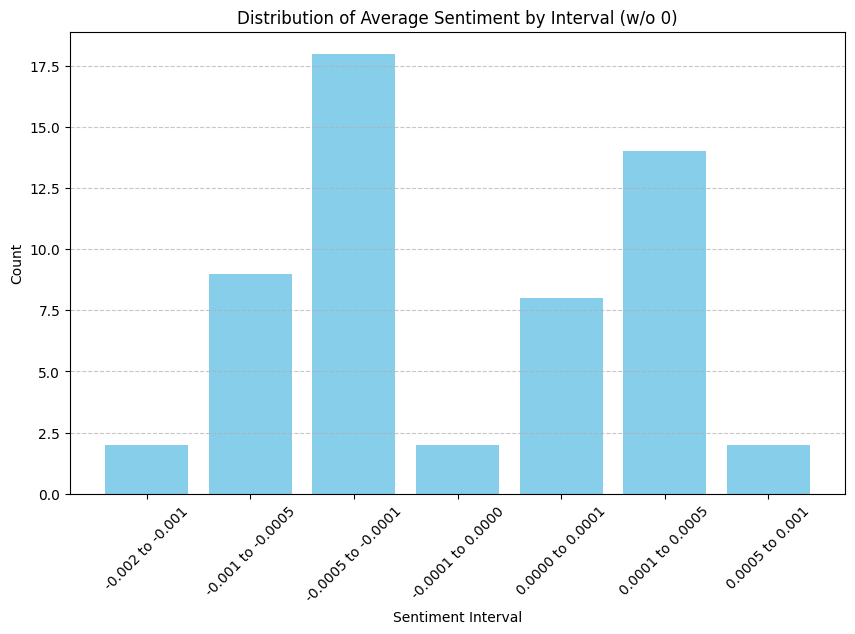

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取 CSV 文件
file_path = '/remote-home/xiaoyili/MASTER-master/polarity_cnt.csv'
df = pd.read_csv(file_path)

# 分析 average_sentiment 字段的取值分布
sentiment_counts = df['average_sentiment'].value_counts().sort_index()

# 将取值为 0 的单独设置
sentiment_counts_0 = sentiment_counts.get(0, 0)
sentiment_counts_non_0 = df[df['average_sentiment']!=0]


# 1、绘制非零值的条形图
# 定义区间
bins = [-0.002, -0.001, -0.0005, -0.0001, 0.000, 0.0001, 0.0005, 0.001]
labels = ['-0.002 to -0.001','-0.001 to -0.0005', '-0.0005 to -0.0001', '-0.0001 to 0.0000', '0.0000 to 0.0001', '0.0001 to 0.0005', '0.0005 to 0.001']

# 将数据分组到区间
sentiment_counts_non_0['sentiment_bin'] = pd.cut(sentiment_counts_non_0['average_sentiment'], bins=bins, labels=labels, include_lowest=True)

# 计算每个区间的频数
value_counts = sentiment_counts_non_0['sentiment_bin'].value_counts().sort_index()

# 绘制条形图
plt.figure(figsize=(10, 6))
plt.bar(value_counts.index, value_counts.values, color='skyblue')
plt.xlabel('Sentiment Interval')
plt.ylabel('Count')
plt.title('Distribution of Average Sentiment by Interval (w/o 0)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 2、绘制取值为 0 的条形图
# if sentiment_counts_0 > 0:
#     ax.bar(0, sentiment_counts_0, label='Sentiment = 0', color='salmon')


# 显示图表
plt.show()

In [12]:
sentiment_counts

-0.001180      1
-0.001111      1
-0.000836      1
-0.000723      1
-0.000717      1
-0.000666      1
-0.000627      1
-0.000542      1
-0.000535      1
-0.000534      1
-0.000506      1
-0.000466      1
-0.000462      1
-0.000458      1
-0.000396      1
-0.000394      1
-0.000387      1
-0.000384      1
-0.000379      1
-0.000368      1
-0.000338      1
-0.000307      1
-0.000300      1
-0.000257      1
-0.000250      1
-0.000240      1
-0.000237      1
-0.000186      1
-0.000133      1
-0.000059      1
-0.000058      1
 0.000000    212
 0.000003      1
 0.000032      1
 0.000037      1
 0.000044      1
 0.000058      1
 0.000064      1
 0.000073      1
 0.000084      1
 0.000106      1
 0.000122      1
 0.000133      1
 0.000137      1
 0.000143      1
 0.000236      1
 0.000271      1
 0.000279      1
 0.000304      1
 0.000328      1
 0.000332      1
 0.000381      1
 0.000412      1
 0.000479      1
 0.000527      1
 0.000874      1
Name: average_sentiment, dtype: int64

In [13]:
df['average_sentiment'].count

<bound method Series.count of 0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
262   -0.000133
263   -0.000300
264    0.000000
265    0.000271
266    0.000000
Name: average_sentiment, Length: 267, dtype: float64>

### (2)评论数量分布

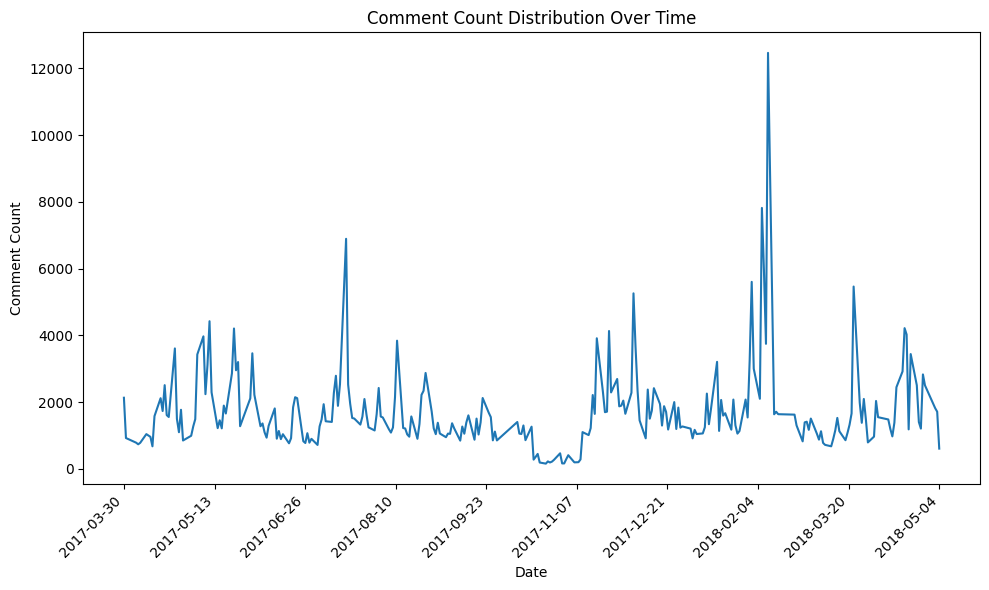

In [37]:
dates = pd.to_datetime(df['date'])
comment_counts = df['comment_count']

# 绘制曲线图
plt.figure(figsize=(10, 6))
plt.plot(dates, comment_counts)
plt.title('Comment Count Distribution Over Time')

plt.xlabel('Date')
plt.ylabel('Comment Count')

# 设置等间距的横坐标刻度
num_ticks = 10  # 指定刻度数量
start_date = dates.min()
end_date = dates.max()
step = (end_date - start_date) / (num_ticks - 1)
ticks = [start_date + i * step for i in range(num_ticks)]

# 设置横坐标刻度
plt.xticks(ticks, rotation=45, ha='right')

plt.tight_layout()  # 自动调整子图参数，使之填充整个图像区域
plt.show()

In [10]:
import pandas as pd

# 读取CSV文件
df = pd.read_csv('/remote-home/xiaoyili/MASTER-master/polarity_cnt.csv')

# 计算comment_count列的统计值
mean_comment_count = df['comment_count'].mean()
min_comment_count = df['comment_count'].min()
max_comment_count = df['comment_count'].max()
median_comment_count = df['comment_count'].median()
std_comment_count = df['comment_count'].std()

# 输出结果
print(f"平均值: {mean_comment_count:.2f}")
print(f"最小值: {min_comment_count}")
print(f"最大值: {max_comment_count}")
print(f"中位数: {median_comment_count}")
print(f"标准差: {std_comment_count:.2f}")

平均值: 1705.45
最小值: 156
最大值: 12461
中位数: 1403.0
标准差: 1267.36


## 2.3 趋势分析

KeyError: 'average_sentiment'

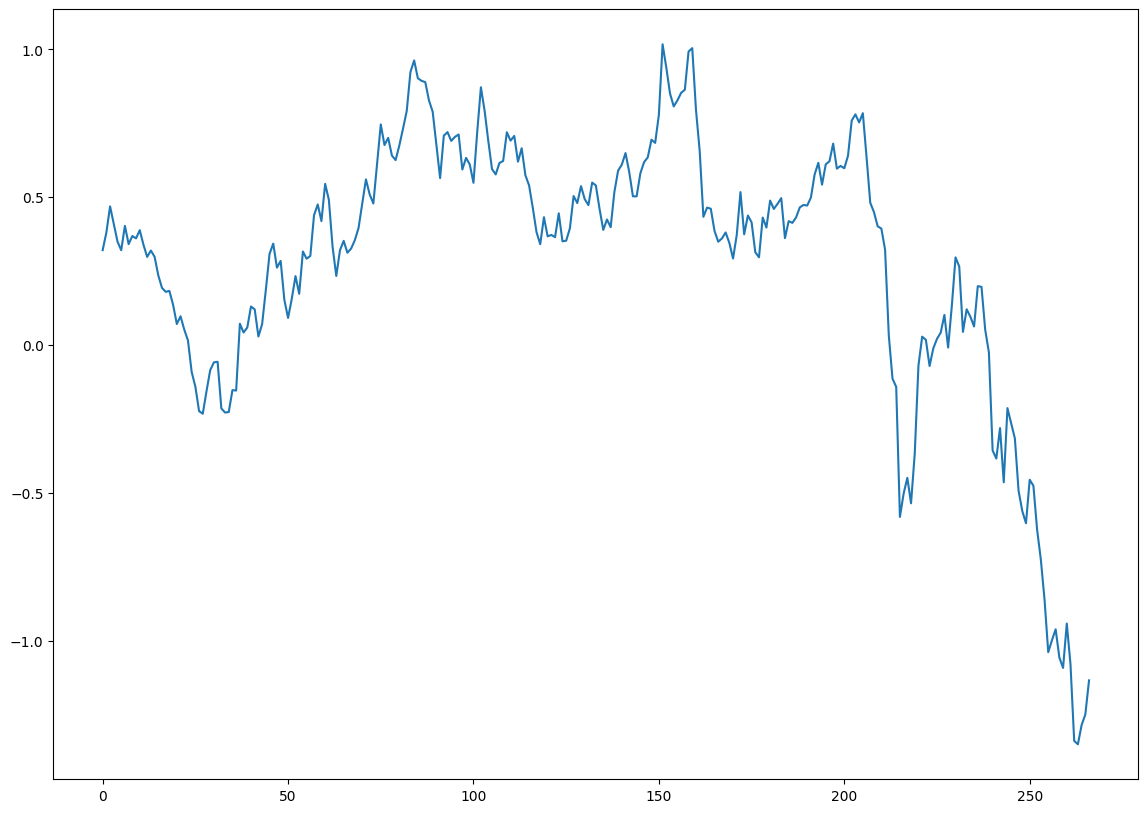

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# 选择一些感兴趣的列进行绘图
columns_to_plot = [
    #'Mask($close/Ref($close,1)-1,\'SH000300\')', # 这个指标计算了股票收盘价相对于前一个交易日收盘价的变化率，并且只保留了与上证指数（SH000300）相关的部分。
    #'Mask(Mean($close/Ref($close,1)-1,5),\'SH000300\')', # 这个指标计算了过去5个交易日股票收盘价变化率的平均值，并且只保留了与上证指数相关的部分
    #'Mask(Std($close/Ref($close,1)-1,5),\'SH000300\')', # 这个指标计算了过去5个交易日股票收盘价变化率的标准差，并且只保留了与上证指数（SH000300）相关的部分
    #'Mask(Mean($close/Ref($close,1)-1,5),\'SH000906\')', # 中证800指数（SH000906）
    #'Mask(Mean($close/Ref($close,1)-1,5),\'SH000905\')', # 中证500指数（SH000905）
    #'Mask(Mean($close/Ref($close,1)-1,20),\'SH000300\')',
    'Mask(Mean($close/Ref($close,1)-1,60),\'SH000300\')',
    'average_sentiment'
]

# 绘制时间序列图
plt.figure(figsize=(14, 10))
for column in columns_to_plot:
    if column == 'average_sentiment':
        plt.plot(df.index, df[column]*1000, label=column+'*10-3')
    else:
        plt.plot(df.index, df[column], label=column)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Analysis')
plt.legend()
plt.show()

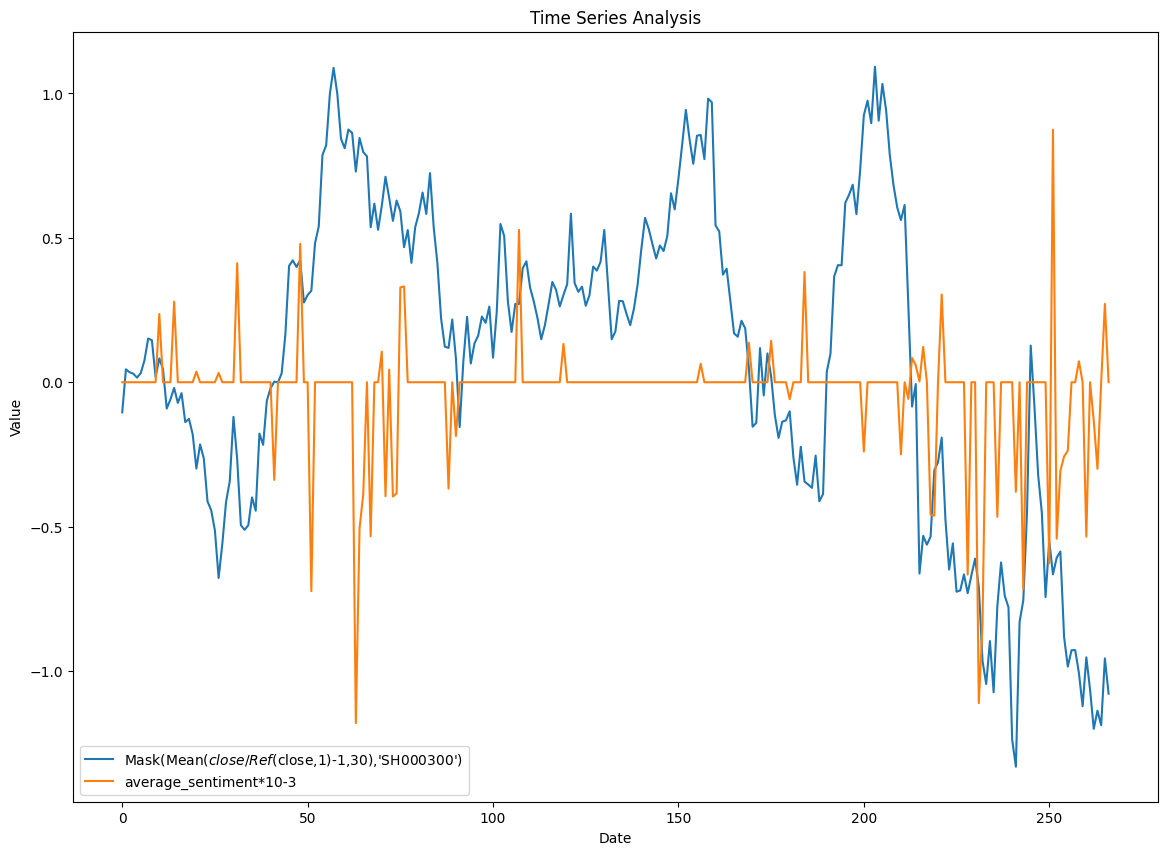

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# 选择一些感兴趣的列进行绘图
columns_to_plot = [
    #'Mask($close/Ref($close,1)-1,\'SH000300\')', # 这个指标计算了股票收盘价相对于前一个交易日收盘价的变化率，并且只保留了与上证指数（SH000300）相关的部分。
    #'Mask(Mean($close/Ref($close,1)-1,5),\'SH000300\')', # 这个指标计算了过去5个交易日股票收盘价变化率的平均值，并且只保留了与上证指数相关的部分
    #'Mask(Std($close/Ref($close,1)-1,5),\'SH000300\')', # 这个指标计算了过去5个交易日股票收盘价变化率的标准差，并且只保留了与上证指数（SH000300）相关的部分
    #'Mask(Mean($close/Ref($close,1)-1,5),\'SH000906\')', # 中证800指数（SH000906）
    #'Mask(Mean($close/Ref($close,1)-1,5),\'SH000905\')', # 中证500指数（SH000905）
    'Mask(Mean($close/Ref($close,1)-1,30),\'SH000300\')',
    #'Mask(Mean($close/Ref($close,1)-1,60),\'SH000300\')',
    'average_sentiment'
]

# 绘制时间序列图
plt.figure(figsize=(14, 10))
for column in columns_to_plot:
    if column == 'average_sentiment':
        plt.plot(df.index, df[column]*1000, label=column+'*10-3')
    else:
        plt.plot(df.index, df[column], label=column)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Analysis')
plt.legend()
plt.show()

### 曲线平滑

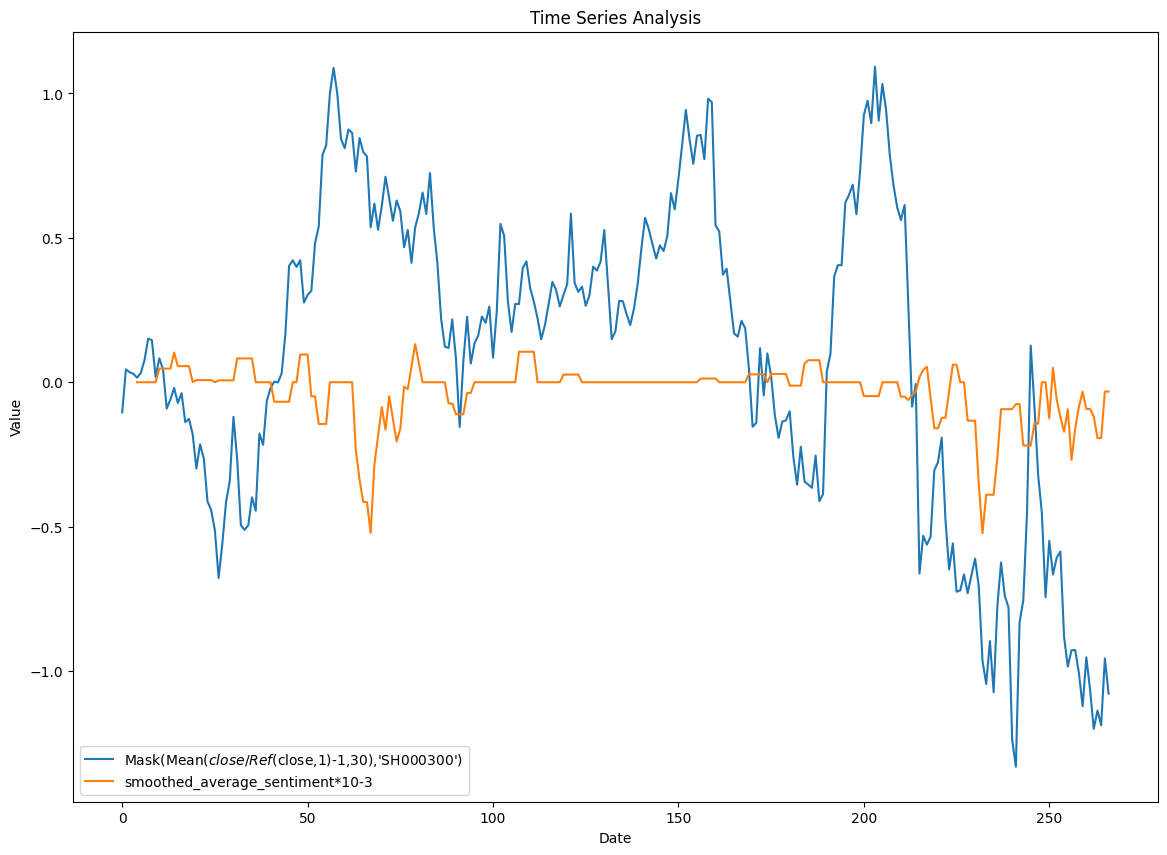

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设df是一个包含时间序列数据的DataFrame，其中有一个名为'value'的列
# df = pd.read_csv('your_data.csv')  # 如果数据来自CSV文件
df['smoothed_average_sentiment'] = df['average_sentiment'].rolling(window=5).mean()  # 计算5个点的移动平均

columns_to_plot = [
    #'Mask($close/Ref($close,1)-1,\'SH000300\')', # 这个指标计算了股票收盘价相对于前一个交易日收盘价的变化率，并且只保留了与上证指数（SH000300）相关的部分。
    #'Mask(Mean($close/Ref($close,1)-1,5),\'SH000300\')', # 这个指标计算了过去5个交易日股票收盘价变化率的平均值，并且只保留了与上证指数相关的部分
    #'Mask(Std($close/Ref($close,1)-1,5),\'SH000300\')', # 这个指标计算了过去5个交易日股票收盘价变化率的标准差，并且只保留了与上证指数（SH000300）相关的部分
    #'Mask(Mean($close/Ref($close,1)-1,5),\'SH000906\')', # 中证800指数（SH000906）
    #'Mask(Mean($close/Ref($close,1)-1,5),\'SH000905\')', # 中证500指数（SH000905）
    #'Mask(Mean($close/Ref($close,1)-1,20),\'SH000300\')',
    'Mask(Mean($close/Ref($close,1)-1,30),\'SH000300\')',
    # 'sentiment_response',
    'smoothed_average_sentiment'
]

# 绘制时间序列图
plt.figure(figsize=(14, 10))
for column in columns_to_plot:
    if column == 'smoothed_average_sentiment':
        plt.plot(df.index, df[column]*1000, label=column+'*10-3')
    else:
        plt.plot(df.index, df[column], label=column)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Analysis')
plt.legend()
plt.show()

## 2.4 相关性分析

/tmp/ipykernel_79278/3067864799.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


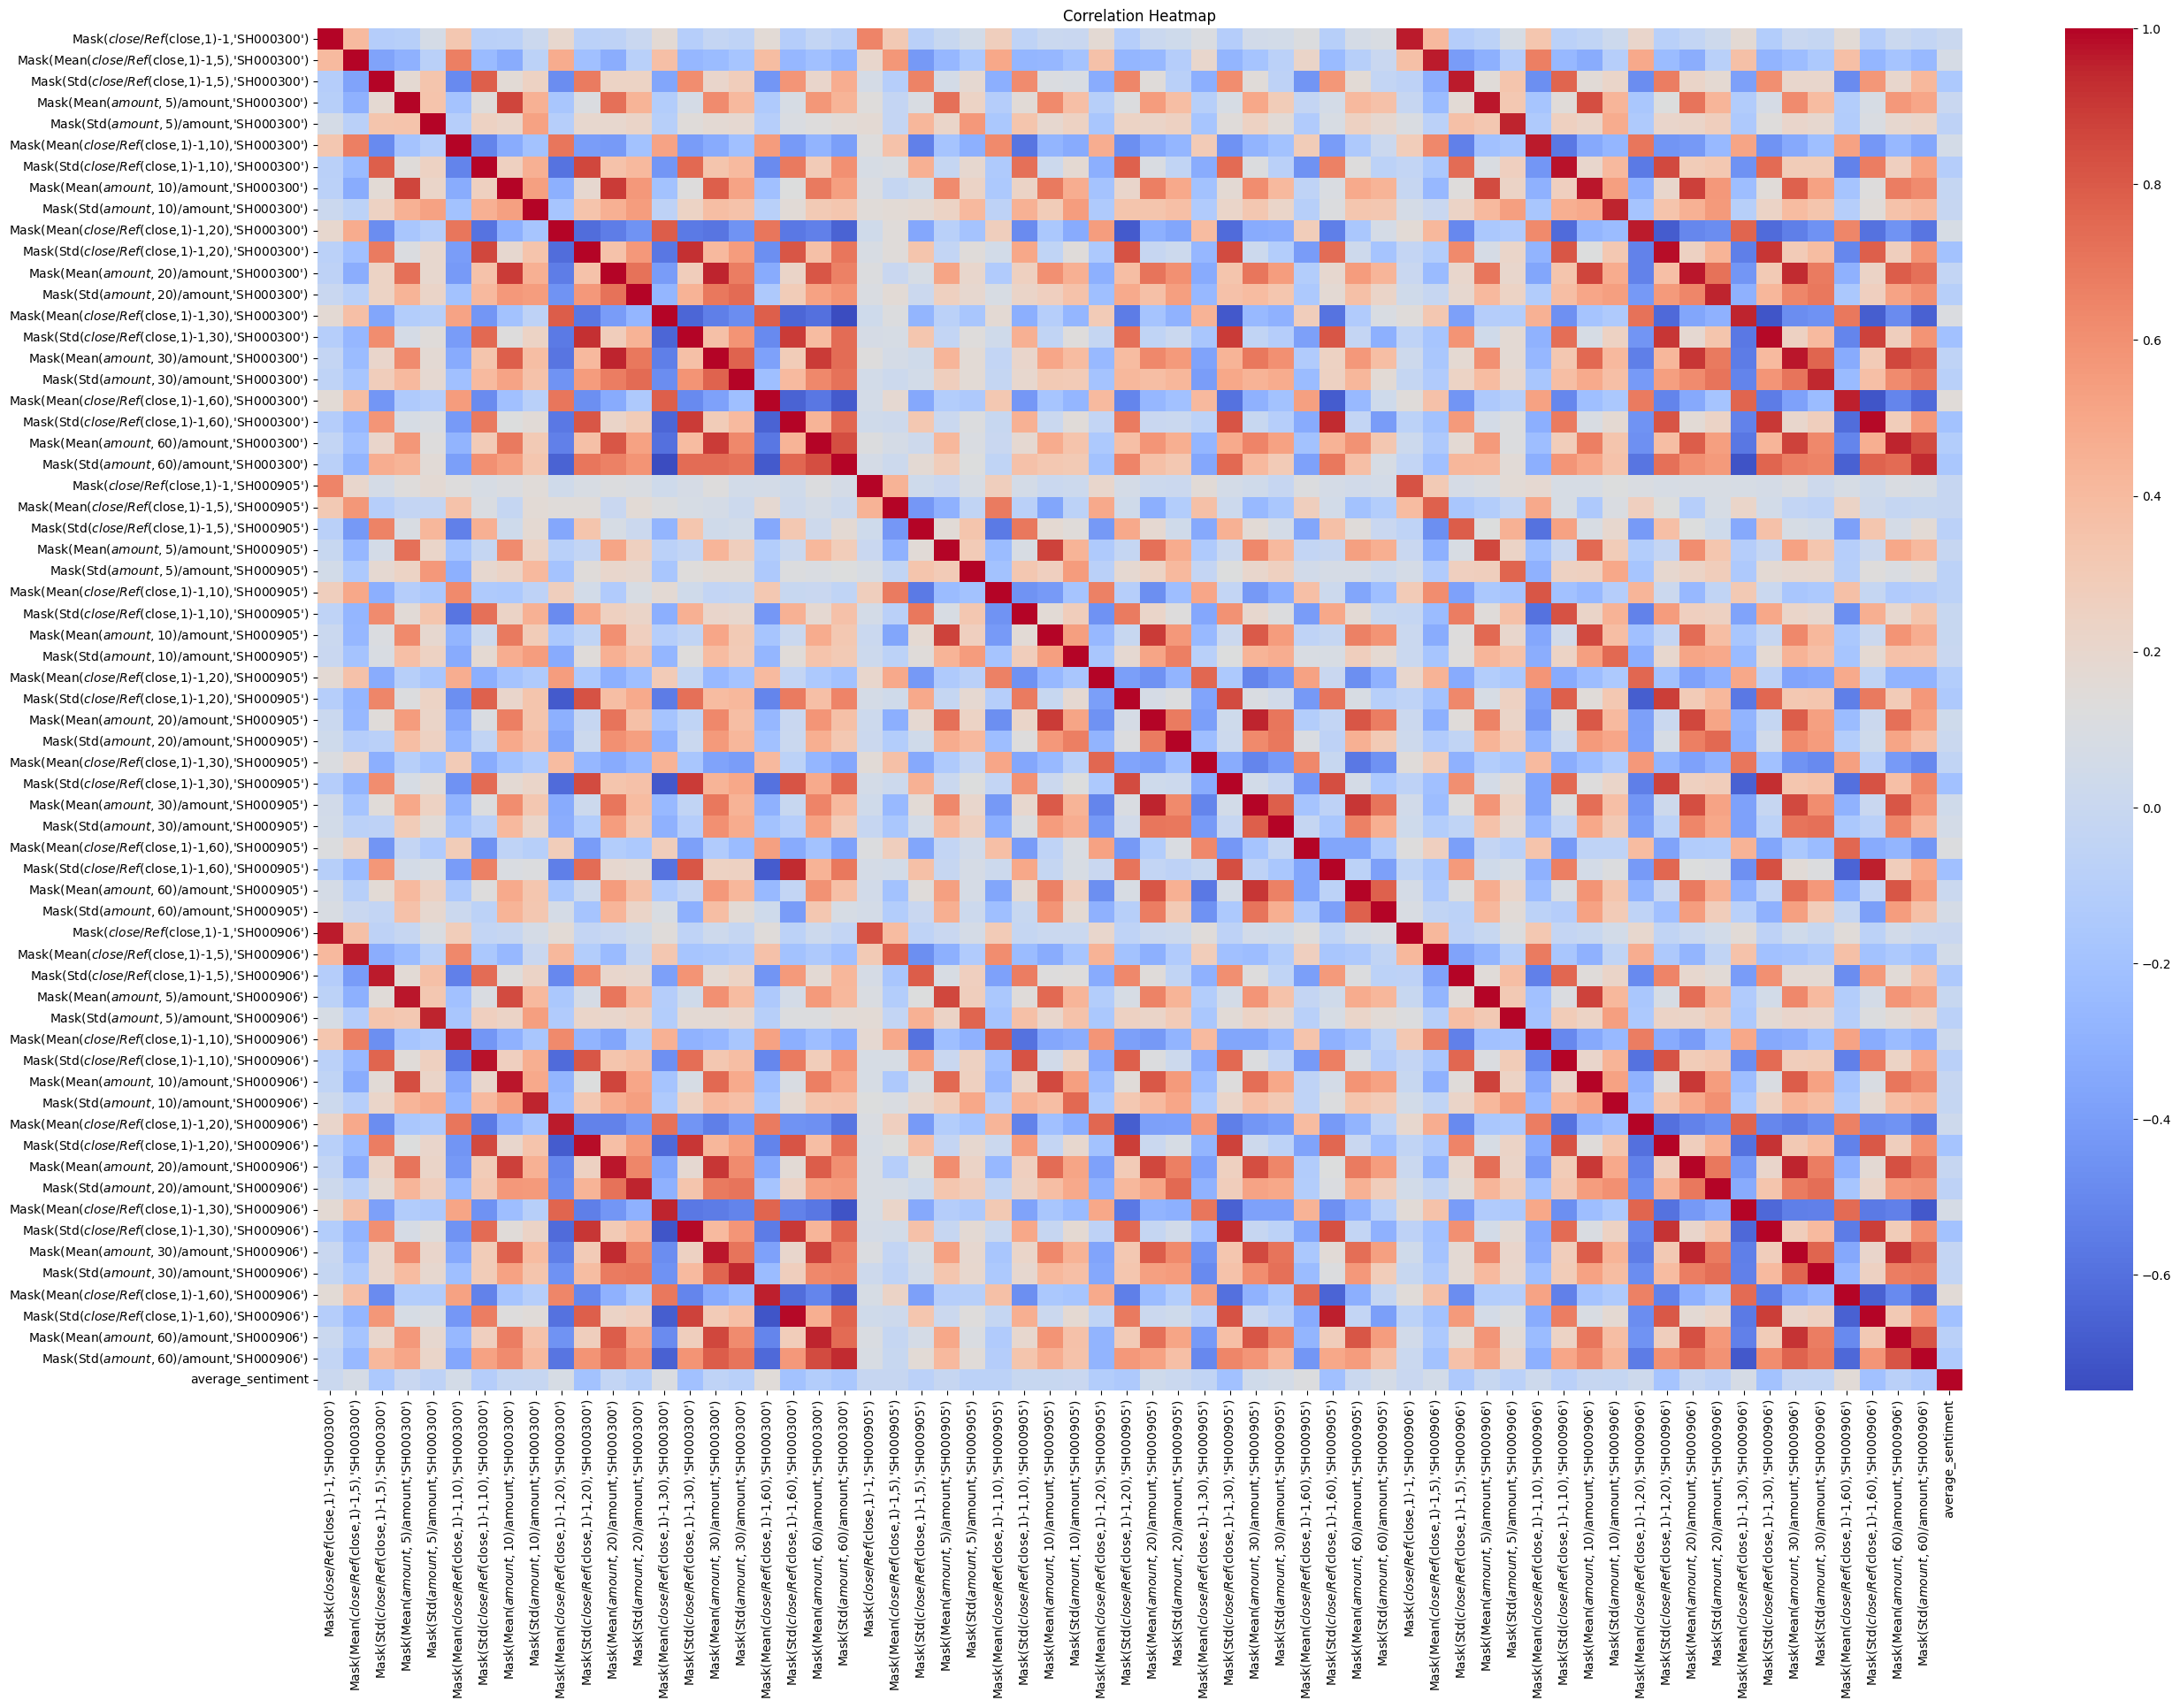

In [41]:
import seaborn as sns
# 计算相关系数矩阵
correlation_matrix = df.corr()
# 绘制相关系数热力图
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix,  cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 2.5 异常检测

In [42]:
# 使用 Z-score 检测异常值

from scipy import stats

# 选择一些感兴趣的列进行异常检测
columns_to_check =[
    #'Mask($close/Ref($close,1)-1,\'SH000300\')', # 这个指标计算了股票收盘价相对于前一个交易日收盘价的变化率，并且只保留了与上证指数（SH000300）相关的部分。
    #'Mask(Mean($close/Ref($close,1)-1,5),\'SH000300\')', # 这个指标计算了过去5个交易日股票收盘价变化率的平均值，并且只保留了与上证指数相关的部分
    #'Mask(Std($close/Ref($close,1)-1,5),\'SH000300\')', # 这个指标计算了过去5个交易日股票收盘价变化率的标准差，并且只保留了与上证指数（SH000300）相关的部分
    #'Mask(Mean($close/Ref($close,1)-1,5),\'SH000906\')', # 中证800指数（SH000906）
    #'Mask(Mean($close/Ref($close,1)-1,5),\'SH000905\')', # 中证500指数（SH000905）
    #'Mask(Mean($close/Ref($close,1)-1,20),\'SH000300\')',
    'Mask(Mean($close/Ref($close,1)-1,60),\'SH000300\')',
    'average_sentiment'
]

# 计算 Z-score
z_scores = stats.zscore(df[columns_to_check])

# 设置阈值，例如 3 标准差
threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)

# 打印异常值
print(outliers[outliers.any(axis=1)])

     Mask(Mean($close/Ref($close,1)-1,60),'SH000300')  average_sentiment
51                                              False               True
63                                              False               True
228                                             False               True
231                                             False               True
232                                             False               True
243                                             False               True
250                                             False               True
251                                             False               True
262                                              True              False
263                                              True              False
264                                              True              False
265                                              True              False
266                                              Tr

# 三、基于Prompt的情感分析

In [ ]:
import json
import random

from openai import OpenAI
from tqdm import tqdm


client = OpenAI(
    api_key="sk-EsD9V9AFdfSh5bblu8F7MX266xw6X7v37A26At5XgfnNgzBP",
    base_url="https://api.agicto.cn/v1"
)


In [44]:
# used for sentiment analysis
sentiment_analysis_prompt = """
[System]
You are an expert in Natural Language Processing (NLP) tasks.

[Task]
从东财股吧抓取的上证指数股评文本：约50万条，时间跨度为17年4月到18年5月。东财上证指数吧十分活跃，约7秒就有人发布一条股评\n
Your task is to classify the sentiment of the stock comment into three categories: positive, negative, and neutral.\n
The score should be a number between -1 and 1, where -1 means the sentiment is most likely negative, 1 means the sentiment is most likely positive, and 0 means the sentiment is neutral.
You should only output the sentiment score, and nothing else.
[End of Task]

[Input]
{}
[End of Input]

[Output]
"""

In [45]:
comments

,created_time,title,date,sentiment
0,2017-03-30 09:29:02,股市解散，都回家吧,2017-03-30,0.0
1,2017-03-30 09:29:09,外围股市都是收涨的,2017-03-30,0.0
2,2017-03-30 09:29:12,全球都在涨...悲催的中国股市...关门吧..坑死人的东西..！,2017-03-30,0.0
3,2017-03-30 09:29:16,让我一次跌个狗[大笑][大笑][大笑],2017-03-30,0.0
4,2017-03-30 09:29:16,那什么去祭祖！,2017-03-30,0.0
...,...,...,...,...
488459,2018-05-04 15:01:43,中国股市就是一潭死水 垃圾遍地 没有任何赚钱效应 这样的市场应该关掉,2018-05-04,0.0
488460,2018-05-04 15:01:53,一月份指数连拉13阳是个笑话？？？,2018-05-04,0.0
488461,2018-05-04 15:01:55,cnmd指数跌10点多股票跌nmd那么多，cnm就是赌博,2018-05-04,0.0
488462,2018-05-04 15:01:57,死了人过头七这股市过,2018-05-04,0.0


In [51]:
# # 初始化分词器
# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# # 定义最大 token 限制
# max_tokens = 32  # 根据实际情况调整

# 存储结果
results = []

# 按日期分组
grouped = comments.groupby('date')

# 遍历每个分组
for date, group in tqdm(grouped, desc="Processing dates"):
    # 拼接文本
    concatenated_text = ' '.join(group['title'])
    
    # # 将文本转换为 tokens
    # tokens = tokenizer.tokenize(concatenated_text)
    
    # # 如果 token 数量超过 max_tokens，则截断
    # if len(tokens) > max_tokens:
    #     tokens = tokens[:max_tokens]
    
    # # 将 tokens 重新组合成字符串
    # truncated_text = tokenizer.convert_tokens_to_string(tokens)
    
    # 构建 prompt
    prompt = sentiment_analysis_prompt.format(concatenated_text)
    
    # 构建消息
    message = [{"role": "user", "content": prompt}]
    
    # 调用模型
    completion = client.chat.completions.create(
        messages=message,
        temperature=1,
        model="Doubao-pro-32k",
        # max_tokens=max_tokens
    )
    
    # 获取响应
    response = completion.choices[0].message.content
    
    # 存储结果
    results.append({
        'date': date,
        'concatenated_text': concatenated_text,
        # 'truncated_text': truncated_text,
        'sentiment_response': response
    })

# 将结果转换为 DataFrame
results_df = pd.DataFrame(results)

# 打印结果
print(results_df)
results_df.to_csv('market_info_with_comment_v2.csv', index=True)

Processing dates: 100%|██████████| 401/401 [37:07<00:00,  5.56s/it] 


           date                                  concatenated_text  \
0    2017-03-30  股市解散，都回家吧 外围股市都是收涨的 全球都在涨...悲催的中国股市...关门吧..坑死人...   
1    2017-03-31  发不了贴，再试试。 资金制约A股上攻乏力 市场做多热情遭遇重挫 提前预祝上证指数月K线振幅跑...   
2    2017-04-01  纳斯达克真牛逼啊，我大a何时能学学[滴汗] 谁说的3284是顶？ 霸天――下周开始将从上证指...   
3    2017-04-02  上证指数毫无参考意义了，只有深证成指、中小板、创业板可以参考。 听说普陀山都在准备上市了，来...   
4    2017-04-03  关于房地产项目冻结问题，王占永回应称，下一步等待新区有关规定，按照整体要求来推进。 《中国经...   
..          ...                                                ...   
396  2018-04-30  两市分红股息5%以上的有哪些？ 求认同，显能力，谁知谁是谁，关键把心地整平坦了，自然前面空旷...   
397  2018-05-01  你们17年赚到钱了吗？ 4月份观点汇总 再次强调   欧洲涨了6周了太厉害了 咱大癌股就是厉...   
398  2018-05-02  6:1日大A下嫁明晟占比若是0.73%左右，但是在9:1日还会嫁出一批的。具体大 大盘一点个...   
399  2018-05-03  走到今天这样，谁最应该负责？站出来，查配资那个棒槌 排骨，你朋友的华能水电咋这么会跌[大笑]...   
400  2018-05-04  底在哪里理论反转线下266点[微笑] 大家节日快乐。下午放半天假。 兖州煤业这只股票业绩很好...   

    sentiment_response  
0                   -1  
1                 -0.3  
2                 -0.2  
3                 -0.1  
4                  0.2  
..       

## 3.1 数据合并与保存

In [14]:

tmp = pd.read_csv('/remote-home/xiaoyili/MASTER-master/market_info_with_comment_v2.csv')
tmp.drop('Unnamed: 0', axis=1, inplace=True)
tmp['date']=pd.to_datetime(tmp['date']).dt.date
print(tmp)

           date                                  concatenated_text  \
0    2017-03-30  股市解散，都回家吧 外围股市都是收涨的 全球都在涨...悲催的中国股市...关门吧..坑死人...   
1    2017-03-31  发不了贴，再试试。 资金制约A股上攻乏力 市场做多热情遭遇重挫 提前预祝上证指数月K线振幅跑...   
2    2017-04-01  纳斯达克真牛逼啊，我大a何时能学学[滴汗] 谁说的3284是顶？ 霸天――下周开始将从上证指...   
3    2017-04-02  上证指数毫无参考意义了，只有深证成指、中小板、创业板可以参考。 听说普陀山都在准备上市了，来...   
4    2017-04-03  关于房地产项目冻结问题，王占永回应称，下一步等待新区有关规定，按照整体要求来推进。 《中国经...   
..          ...                                                ...   
396  2018-04-30  两市分红股息5%以上的有哪些？ 求认同，显能力，谁知谁是谁，关键把心地整平坦了，自然前面空旷...   
397  2018-05-01  你们17年赚到钱了吗？ 4月份观点汇总 再次强调   欧洲涨了6周了太厉害了 咱大癌股就是厉...   
398  2018-05-02  6:1日大A下嫁明晟占比若是0.73%左右，但是在9:1日还会嫁出一批的。具体大 大盘一点个...   
399  2018-05-03  走到今天这样，谁最应该负责？站出来，查配资那个棒槌 排骨，你朋友的华能水电咋这么会跌[大笑]...   
400  2018-05-04  底在哪里理论反转线下266点[微笑] 大家节日快乐。下午放半天假。 兖州煤业这只股票业绩很好...   

    sentiment_response  
0                   -1  
1                 -0.3  
2                 -0.2  
3                 -0.1  
4                  0.2  
..       

In [ ]:
# print(market_info_filtered['date'])
# print(tmp['date'])

print(market_info_filtered['date'].unique())
print(tmp['date'].unique())
# 连接错误的原因：两个date的格式不同
# 直接读入的tmp格式为str，需要转变为datetime的date格式

[datetime.date(2017, 3, 30) datetime.date(2017, 3, 31)
 datetime.date(2017, 4, 5) datetime.date(2017, 4, 6)
 datetime.date(2017, 4, 7) datetime.date(2017, 4, 10)
 datetime.date(2017, 4, 11) datetime.date(2017, 4, 12)
 datetime.date(2017, 4, 13) datetime.date(2017, 4, 14)
 datetime.date(2017, 4, 17) datetime.date(2017, 4, 18)
 datetime.date(2017, 4, 19) datetime.date(2017, 4, 20)
 datetime.date(2017, 4, 21) datetime.date(2017, 4, 24)
 datetime.date(2017, 4, 25) datetime.date(2017, 4, 26)
 datetime.date(2017, 4, 27) datetime.date(2017, 4, 28)
 datetime.date(2017, 5, 2) datetime.date(2017, 5, 3)
 datetime.date(2017, 5, 4) datetime.date(2017, 5, 5)
 datetime.date(2017, 5, 8) datetime.date(2017, 5, 9)
 datetime.date(2017, 5, 10) datetime.date(2017, 5, 11)
 datetime.date(2017, 5, 12) datetime.date(2017, 5, 15)
 datetime.date(2017, 5, 16) datetime.date(2017, 5, 17)
 datetime.date(2017, 5, 18) datetime.date(2017, 5, 19)
 datetime.date(2017, 5, 22) datetime.date(2017, 5, 23)
 datetime.date(2017

In [ ]:
merged_data = pd.merge(market_info_filtered, tmp, on='date', how='left')
merged_data = merged_data.fillna(0)  # 处理缺失值

# 统一处理
def unify_data(df):
    # 将date作为index
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    
    # 将除了评论文本之外的列转换为数值型(有些llm无法评分的情况，所以最后一列是文本而非数值)
    # 定义要保留为字符串类型的列
    exclude_column = 'concatenated_text'
    columns_to_convert = df.columns.difference([exclude_column])
    df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

    return df

df = unify_data(merged_data)

print(df)
df.to_csv('prompt_analysis.csv',index=True)

            Mask($close/Ref($close,1)-1,'SH000300')  \
date                                                  
2017-03-30                                -0.765678   
2017-03-31                                 0.465748   
2017-04-05                                 1.199412   
2017-04-06                                 0.223849   
2017-04-07                                 0.052257   
...                                             ...   
2018-04-26                                -1.738362   
2018-04-27                                -0.001583   
2018-05-02                                 0.126187   
2018-05-03                                 0.660670   
2018-05-04                                -0.466741   

            Mask(Mean($close/Ref($close,1)-1,5),'SH000300')  \
date                                                          
2017-03-30                                        -0.305372   
2017-03-31                                        -0.381107   
2017-04-05                      

## 3.2 数据分布

In [27]:
import pandas as pd
results_df = pd.read_csv('/remote-home/xiaoyili/MASTER-master/prompt_analysis.csv')
results_df['sentiment_response'].value_counts().sort_index(ascending=True)
print(results_df)

           date  Mask($close/Ref($close,1)-1,'SH000300')  \
0    2017-03-30                                -0.765678   
1    2017-03-31                                 0.465748   
2    2017-04-05                                 1.199412   
3    2017-04-06                                 0.223849   
4    2017-04-07                                 0.052257   
..          ...                                      ...   
262  2018-04-26                                -1.738362   
263  2018-04-27                                -0.001583   
264  2018-05-02                                 0.126187   
265  2018-05-03                                 0.660670   
266  2018-05-04                                -0.466741   

     Mask(Mean($close/Ref($close,1)-1,5),'SH000300')  \
0                                          -0.305372   
1                                          -0.381107   
2                                           0.168039   
3                                           0.336511   

In [6]:
results_df['sentiment_response']

0     -1.0
1     -0.3
2      0.5
3      0.5
4      0.1
      ... 
262    NaN
263    NaN
264   -0.3
265   -0.6
266   -0.2
Name: sentiment_response, Length: 267, dtype: float64

### (1)查看评分为nan的样例

37个

In [63]:
# 筛选出 sentiment_response 列中的 NaN 值
non_numeric_df = results_df[results_df['sentiment_response'].isna()]

# 查看取值为null的评分
print(results_df['sentiment_response'].isnull().sum()) 
print(non_numeric_df[['date','concatenated_text','sentiment_response']])

37
           date                                  concatenated_text  \
15   2017-04-24  说是分红1元变俩五角，在来个10股送两块五扣税，什么1逻辑股民遭殃 大盘最近这么差，只要涨的...   
23   2017-05-05  今年重回2600点以下 帝妖：“五穷六绝七翻身”有一定的道理 不管你怎么吹！熊市就是熊市！[...   
24   2017-05-08  周一股市要大涨，巴菲特说了，中国股票比美国更廉价！ 《再谱写命运天书》 漫漫A股熊关路， 白...   
26   2017-05-10  上证简析（1） 天龙八部,龙众起飞上证周三收复3103 我大A暴涨0.06点   壮哉 新华...   
27   2017-05-11  如这波被套或亏损心情可以理解，但怨不得管理层怨不得专家及政策，唯一该怨的恰恰是你 2008....   
34   2017-05-22  看看这熊样 3016下周破的可能性较大，尔等快逃命去吧，中国股市小散没出路的。 指望牛市 白...   
35   2017-05-23  再次重申：美股上涨创历史新高，是单方面的，无效的，我们坚决不认同。众所周知，美股 老夫目前对...   
36   2017-05-24  小散跌得走路的力气都没有了，头晕眼花，人也颓废了 之前13年有过一波这种行情，指数跌了一百来...   
37   2017-05-25  端午节利空，粽子投到江里喂鱼吃，身不亏钱亏 注册制的实际实行已在狂发新股中体现，a股价格体系...   
40   2017-06-01  明天大涨43点，无非就点后差距了吧！ 明天大A跟上全球 为什么要黑周四？难道红周四不行吗？信...   
69   2017-07-12  现在50指标股上涨，机构开始疯言疯语什么中国股市开始价值投资。二十多年股市见得多 马云旗下公...   
71   2017-07-14  时间看到八月中，能量沪市不上3000亿就不用担心。 中杭三 管你拉什么打什么，反正我只做30...   
73   2017-07-18  上证50有2000万股民? 上证五零的交易量占到四分之一，工行市值两万亿 强烈要求乐视按规定...   
84   2017-08-02  

### (2)查看数值型评分的分布

In [4]:
results_df['sentiment_response'].value_counts().sort_index(ascending=True)

-1.000     9
-0.800     1
-0.700     1
-0.600     5
-0.500    40
-0.300    20
-0.200    37
-0.100     8
 0.000    22
 0.005     1
 0.010     1
 0.050    10
 0.100    24
 0.200    19
 0.300     1
 0.500    30
 7.000     1
Name: sentiment_response, dtype: int64

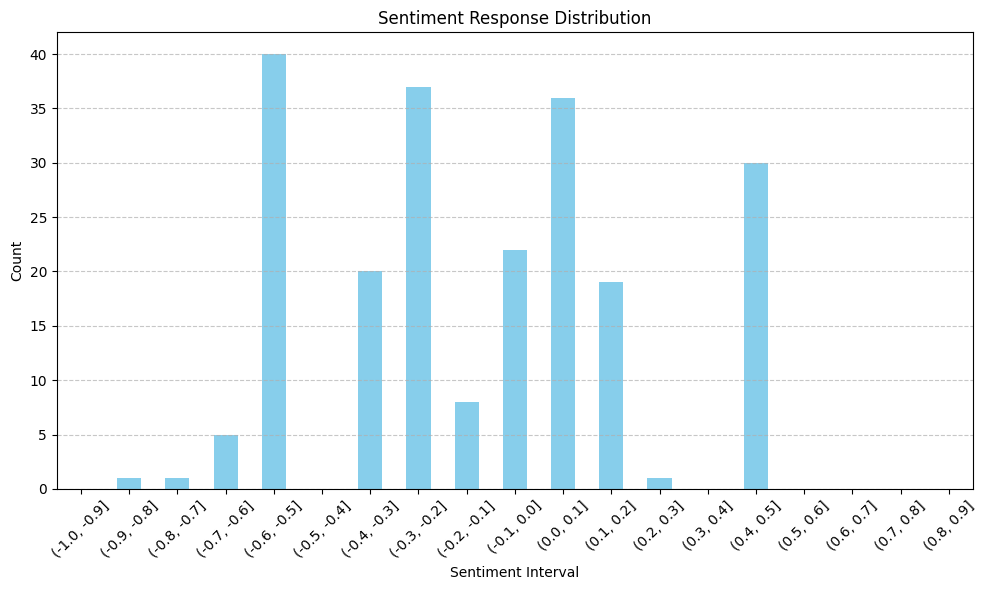

In [26]:
import re

# 定义区间范围和间隔
bin_range = (-1, 1)  # 假设 sentiment 范围在 -2 到 2 之间
bin_width = 0.1  # 区间宽度
bins = pd.interval_range(start=bin_range[0], end=bin_range[1], freq=bin_width)

# 按区间统计数目
sentiment_counts = pd.cut(results_df['sentiment_response'], bins=bins).value_counts().sort_index()

# 但是series索引区间的小数数目显示有问题
index = sentiment_counts.index
# 使用正则表达式替换索引中的数字，使其只保留一位小数
new_index = [re.sub(r'\d+\.\d+', lambda m: '{:.1f}'.format(float(m.group())), str(i)) for i in index]
# 创建一个新的 Series，使用修改后的索引
new_data = pd.Series(sentiment_counts.values, index=new_index, name='sentiment_response')


# 绘制条形图
plt.figure(figsize=(10, 6))
new_data.plot(kind='bar', color='skyblue')

plt.title('Sentiment Response Distribution')
plt.xlabel('Sentiment Interval')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 3.3 趋势分析

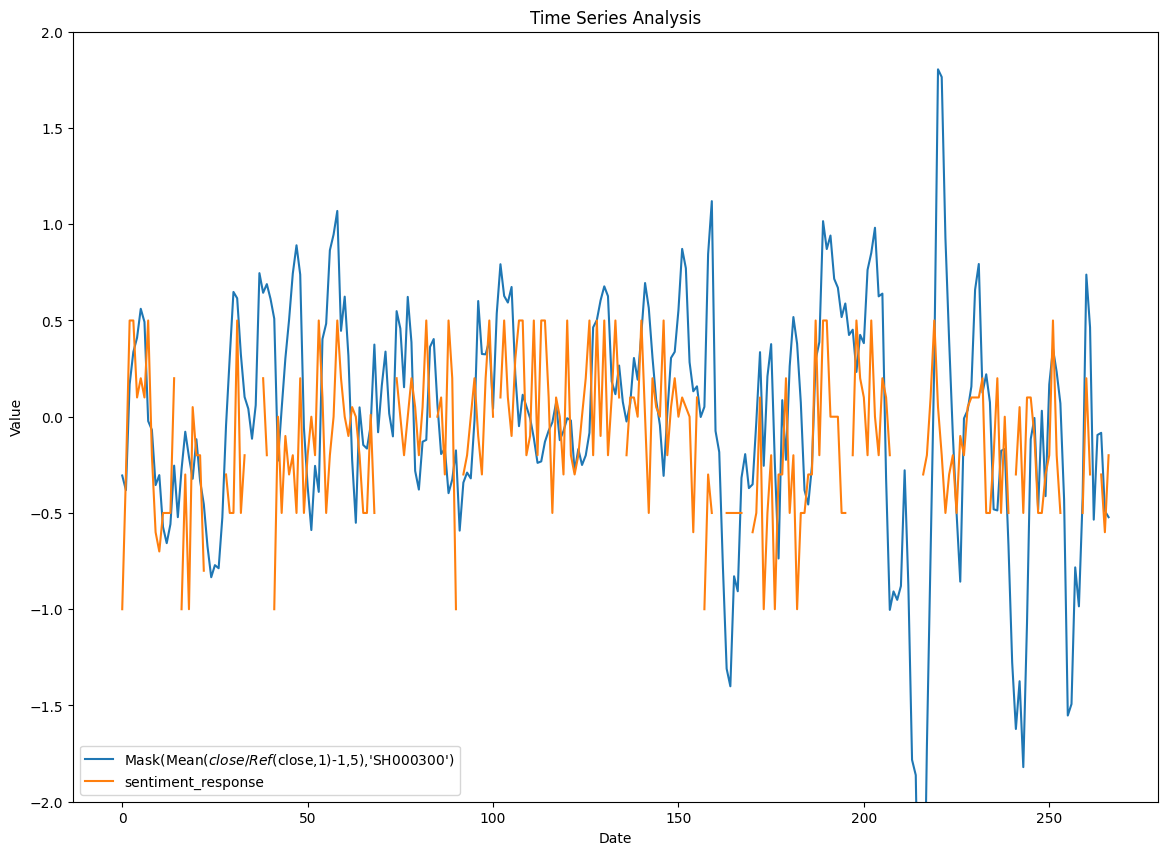

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

df = results_df

# 选择一些感兴趣的列进行绘图
columns_to_plot = [
    #'Mask($close/Ref($close,1)-1,\'SH000300\')', # 这个指标计算了股票收盘价相对于前一个交易日收盘价的变化率，并且只保留了与上证指数（SH000300）相关的部分。
    #'Mask(Mean($close/Ref($close,1)-1,5),\'SH000300\')', # 这个指标计算了过去5个交易日股票收盘价变化率的平均值，并且只保留了与上证指数相关的部分
    #'Mask(Std($close/Ref($close,1)-1,5),\'SH000300\')', # 这个指标计算了过去5个交易日股票收盘价变化率的标准差，并且只保留了与上证指数（SH000300）相关的部分
    #'Mask(Mean($close/Ref($close,1)-1,5),\'SH000906\')', # 中证800指数（SH000906）
    #'Mask(Mean($close/Ref($close,1)-1,5),\'SH000905\')', # 中证500指数（SH000905）
    #'Mask(Mean($close/Ref($close,1)-1,20),\'SH000300\')',
    'Mask(Mean($close/Ref($close,1)-1,5),\'SH000300\')',
    'sentiment_response'
]

# 绘制时间序列图
plt.figure(figsize=(14, 10))
for column in columns_to_plot:
    plt.plot(df.index, df[column], label=column)

# 设置纵坐标范围
plt.ylim(-2, 2)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Analysis')
plt.legend()
plt.show()

### 曲线平滑

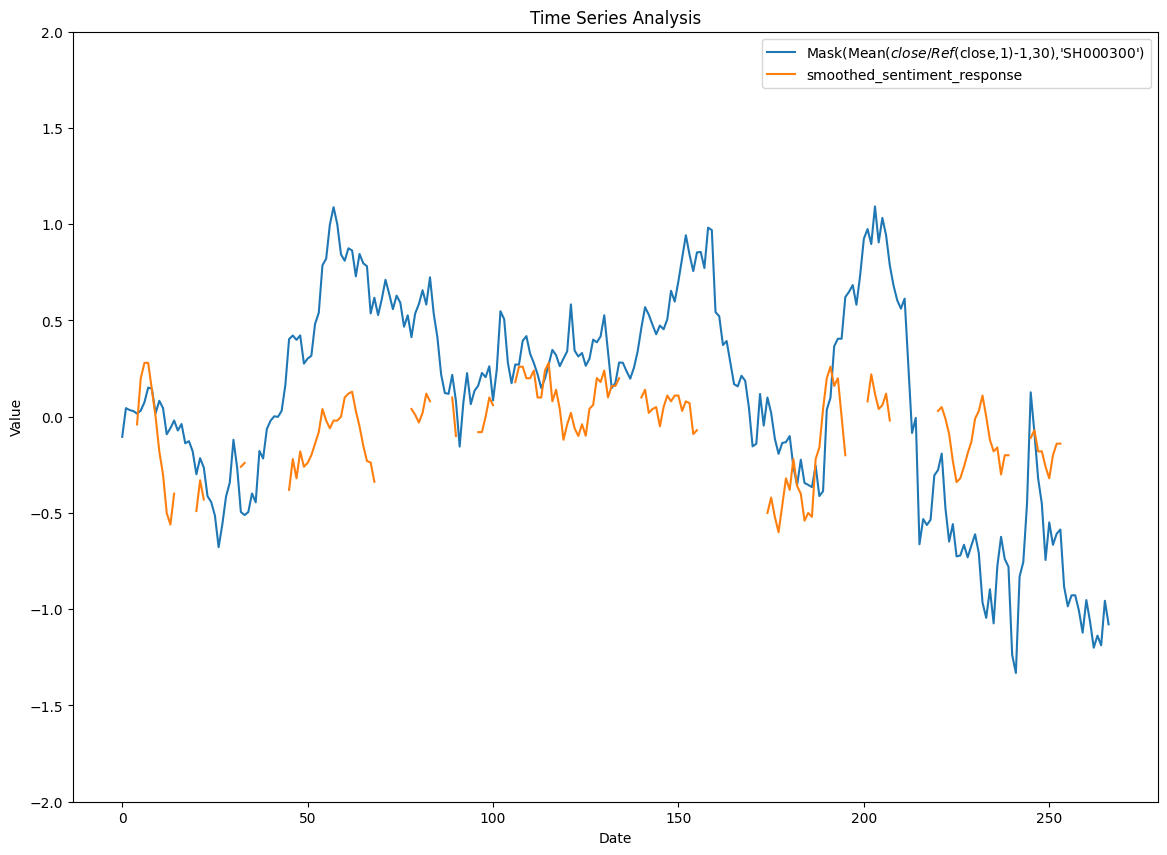

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设df是一个包含时间序列数据的DataFrame，其中有一个名为'value'的列
# df = pd.read_csv('your_data.csv')  # 如果数据来自CSV文件
df['smoothed_sentiment_response'] = df['sentiment_response'].rolling(window=5).mean()  # 计算5个点的移动平均

columns_to_plot = [
    #'Mask($close/Ref($close,1)-1,\'SH000300\')', # 这个指标计算了股票收盘价相对于前一个交易日收盘价的变化率，并且只保留了与上证指数（SH000300）相关的部分。
    #'Mask(Mean($close/Ref($close,1)-1,5),\'SH000300\')', # 这个指标计算了过去5个交易日股票收盘价变化率的平均值，并且只保留了与上证指数相关的部分
    #'Mask(Std($close/Ref($close,1)-1,5),\'SH000300\')', # 这个指标计算了过去5个交易日股票收盘价变化率的标准差，并且只保留了与上证指数（SH000300）相关的部分
    #'Mask(Mean($close/Ref($close,1)-1,5),\'SH000906\')', # 中证800指数（SH000906）
    #'Mask(Mean($close/Ref($close,1)-1,5),\'SH000905\')', # 中证500指数（SH000905）
    #'Mask(Mean($close/Ref($close,1)-1,20),\'SH000300\')',
    'Mask(Mean($close/Ref($close,1)-1,30),\'SH000300\')',
    # 'sentiment_response',
    'smoothed_sentiment_response'
]

# 绘制时间序列图
plt.figure(figsize=(14, 10))
for column in columns_to_plot:
    plt.plot(df.index, df[column], label=column)

# 设置纵坐标范围
plt.ylim(-2, 2)

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Analysis')
plt.legend()
plt.show()

## 3.4 相关性分析

In [29]:
df.columns

Index(['date', 'Mask($close/Ref($close,1)-1,'SH000300')',
       'Mask(Mean($close/Ref($close,1)-1,5),'SH000300')',
       'Mask(Std($close/Ref($close,1)-1,5),'SH000300')',
       'Mask(Mean($amount,5)/$amount,'SH000300')',
       'Mask(Std($amount,5)/$amount,'SH000300')',
       'Mask(Mean($close/Ref($close,1)-1,10),'SH000300')',
       'Mask(Std($close/Ref($close,1)-1,10),'SH000300')',
       'Mask(Mean($amount,10)/$amount,'SH000300')',
       'Mask(Std($amount,10)/$amount,'SH000300')',
       'Mask(Mean($close/Ref($close,1)-1,20),'SH000300')',
       'Mask(Std($close/Ref($close,1)-1,20),'SH000300')',
       'Mask(Mean($amount,20)/$amount,'SH000300')',
       'Mask(Std($amount,20)/$amount,'SH000300')',
       'Mask(Mean($close/Ref($close,1)-1,30),'SH000300')',
       'Mask(Std($close/Ref($close,1)-1,30),'SH000300')',
       'Mask(Mean($amount,30)/$amount,'SH000300')',
       'Mask(Std($amount,30)/$amount,'SH000300')',
       'Mask(Mean($close/Ref($close,1)-1,60),'SH000300')',
       

/tmp/ipykernel_6372/3067864799.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


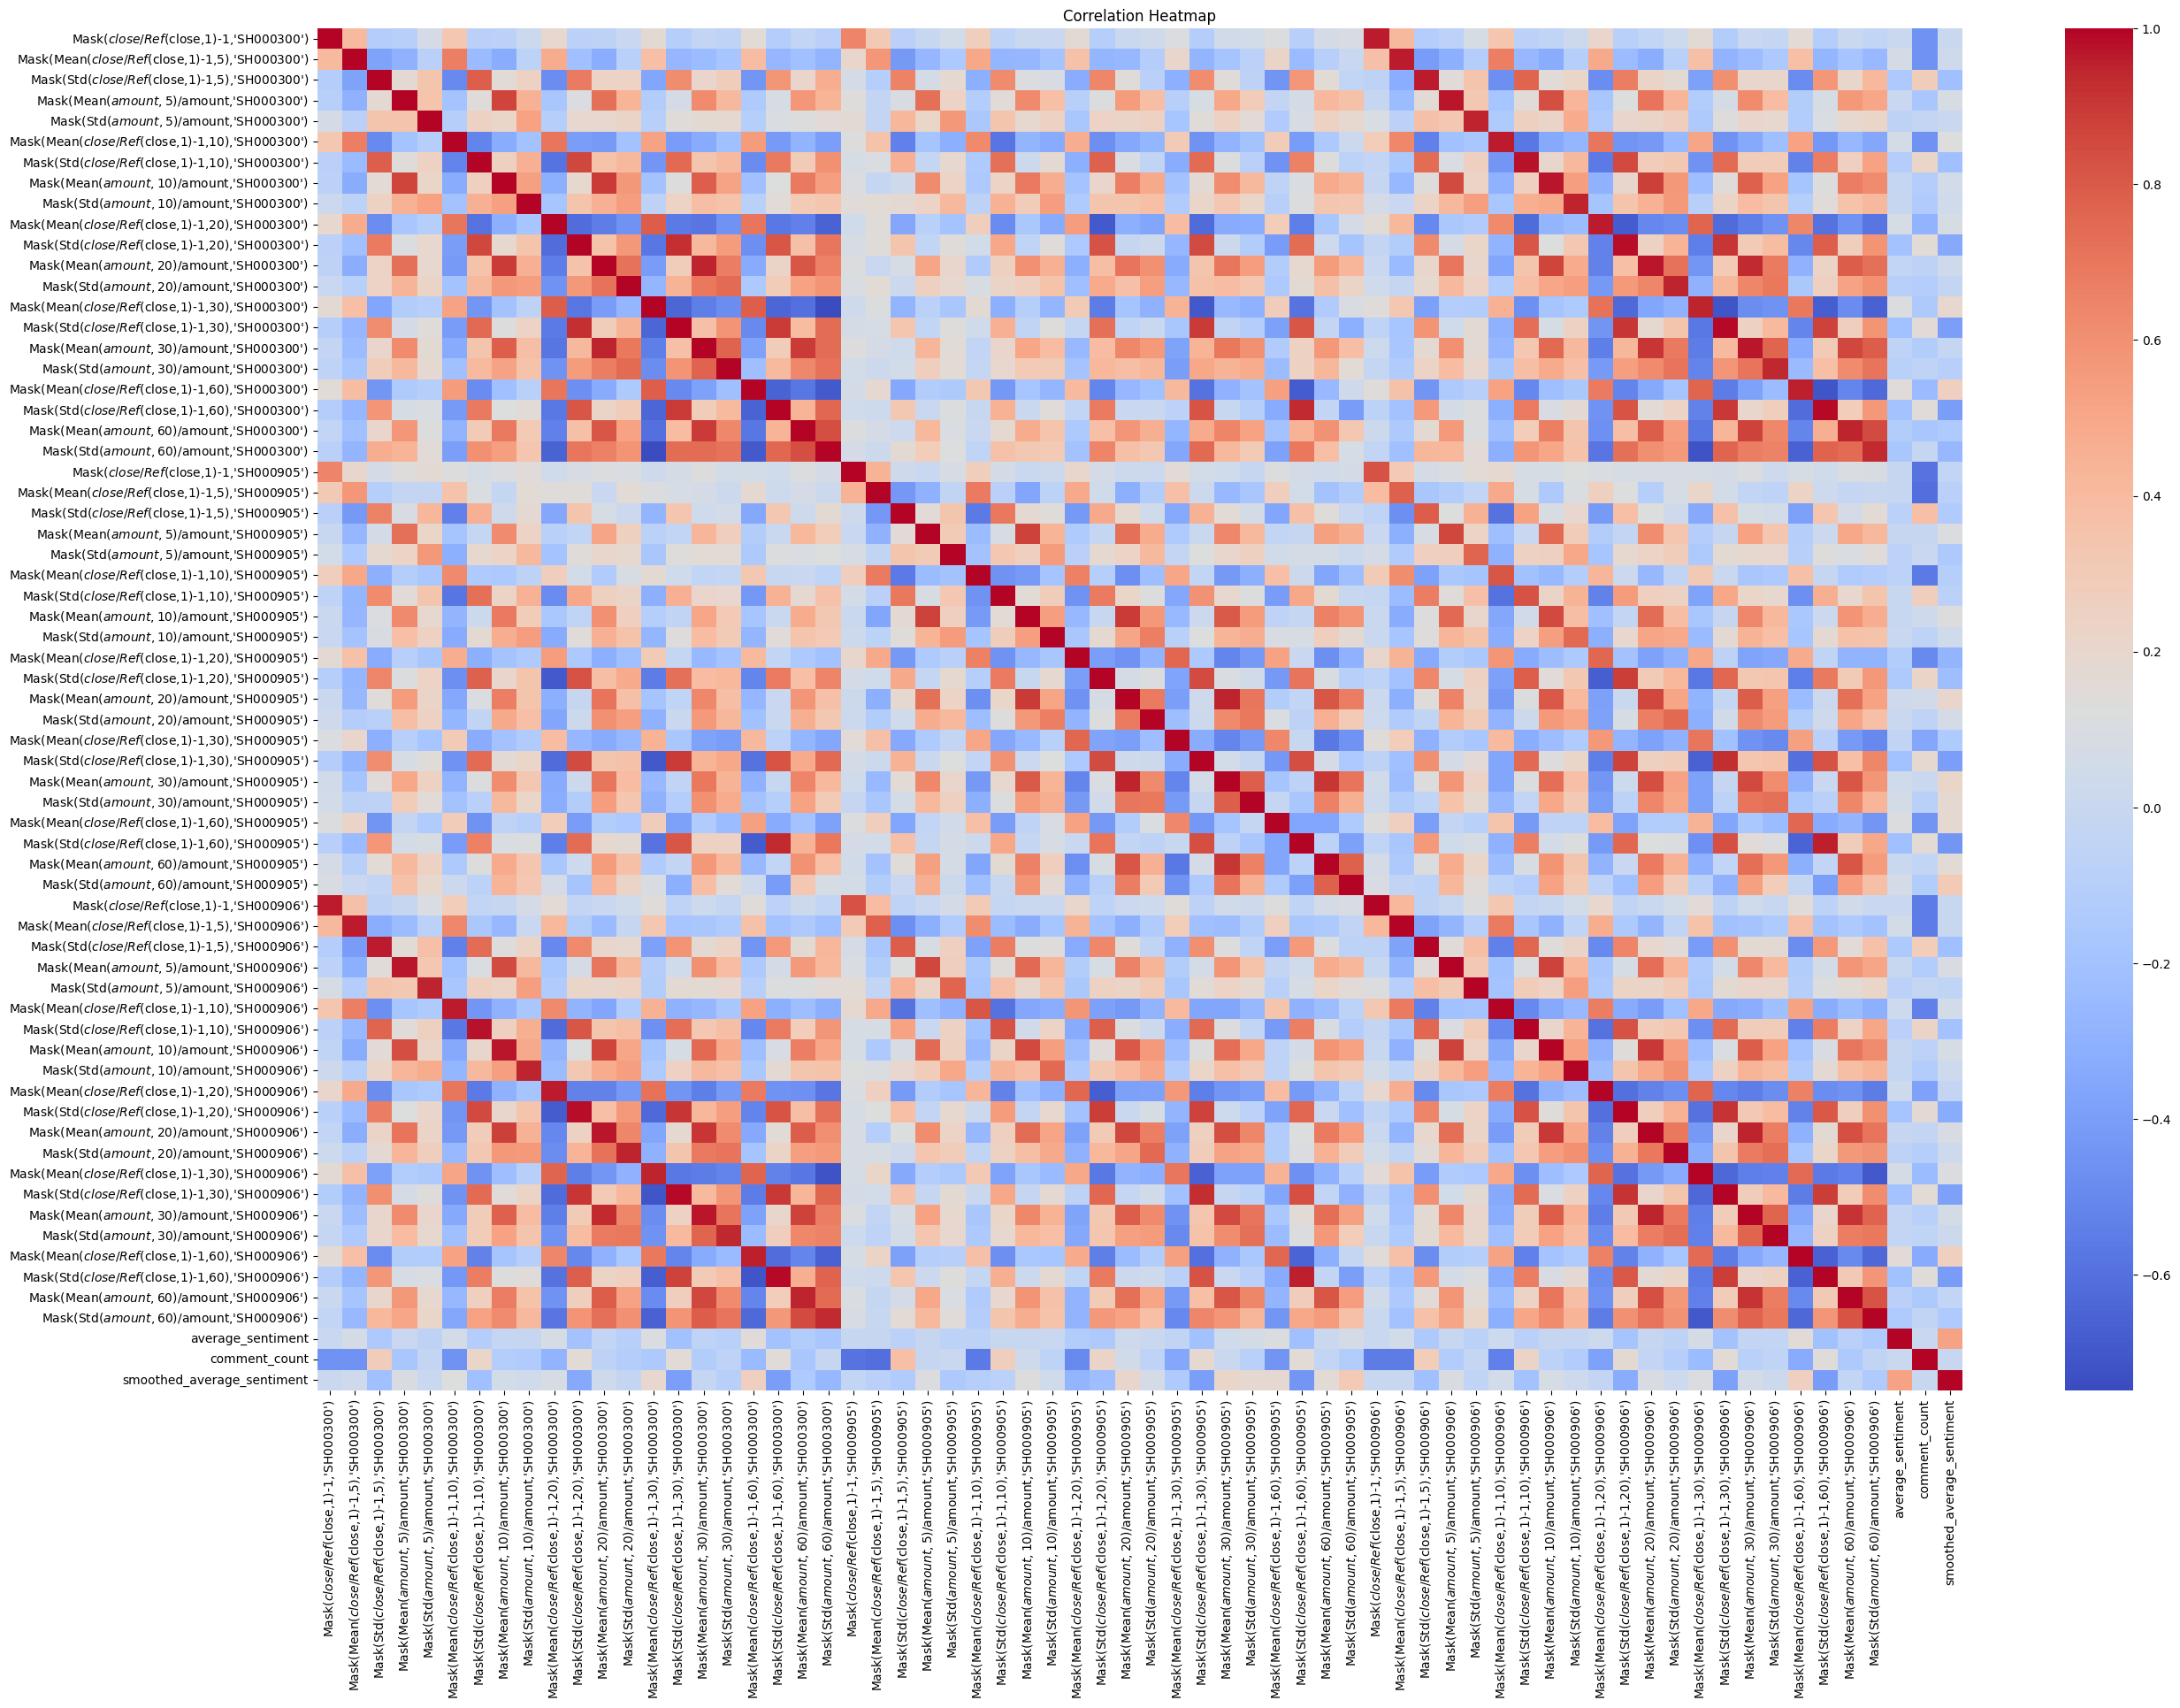

In [30]:
import seaborn as sns
# 计算相关系数矩阵
correlation_matrix = df.corr()
# 绘制相关系数热力图
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix,  cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 整体相关性分析

In [1]:
import pandas as pd
prompt_df = pd.read_csv('/remote-home/xiaoyili/MASTER-master/prompt_analysis.csv')
polarity_cnt_df=pd.read_csv('/remote-home/xiaoyili/MASTER-master/polarity_cnt.csv')

In [2]:
overall = pd.merge(prompt_df, polarity_cnt_df[['date','average_sentiment','comment_count']], on='date')
overall.drop(columns=['concatenated_text'], inplace=True)
overall.set_index('date', inplace=True)
overall = overall.apply(pd.to_numeric, errors='coerce')
overall.to_csv('overall_data.csv', index=False)

In [5]:
overall.columns

Index(['Mask($close/Ref($close,1)-1,'SH000300')',
       'Mask(Mean($close/Ref($close,1)-1,5),'SH000300')',
       'Mask(Std($close/Ref($close,1)-1,5),'SH000300')',
       'Mask(Mean($amount,5)/$amount,'SH000300')',
       'Mask(Std($amount,5)/$amount,'SH000300')',
       'Mask(Mean($close/Ref($close,1)-1,10),'SH000300')',
       'Mask(Std($close/Ref($close,1)-1,10),'SH000300')',
       'Mask(Mean($amount,10)/$amount,'SH000300')',
       'Mask(Std($amount,10)/$amount,'SH000300')',
       'Mask(Mean($close/Ref($close,1)-1,20),'SH000300')',
       'Mask(Std($close/Ref($close,1)-1,20),'SH000300')',
       'Mask(Mean($amount,20)/$amount,'SH000300')',
       'Mask(Std($amount,20)/$amount,'SH000300')',
       'Mask(Mean($close/Ref($close,1)-1,30),'SH000300')',
       'Mask(Std($close/Ref($close,1)-1,30),'SH000300')',
       'Mask(Mean($amount,30)/$amount,'SH000300')',
       'Mask(Std($amount,30)/$amount,'SH000300')',
       'Mask(Mean($close/Ref($close,1)-1,60),'SH000300')',
       'Mask(St

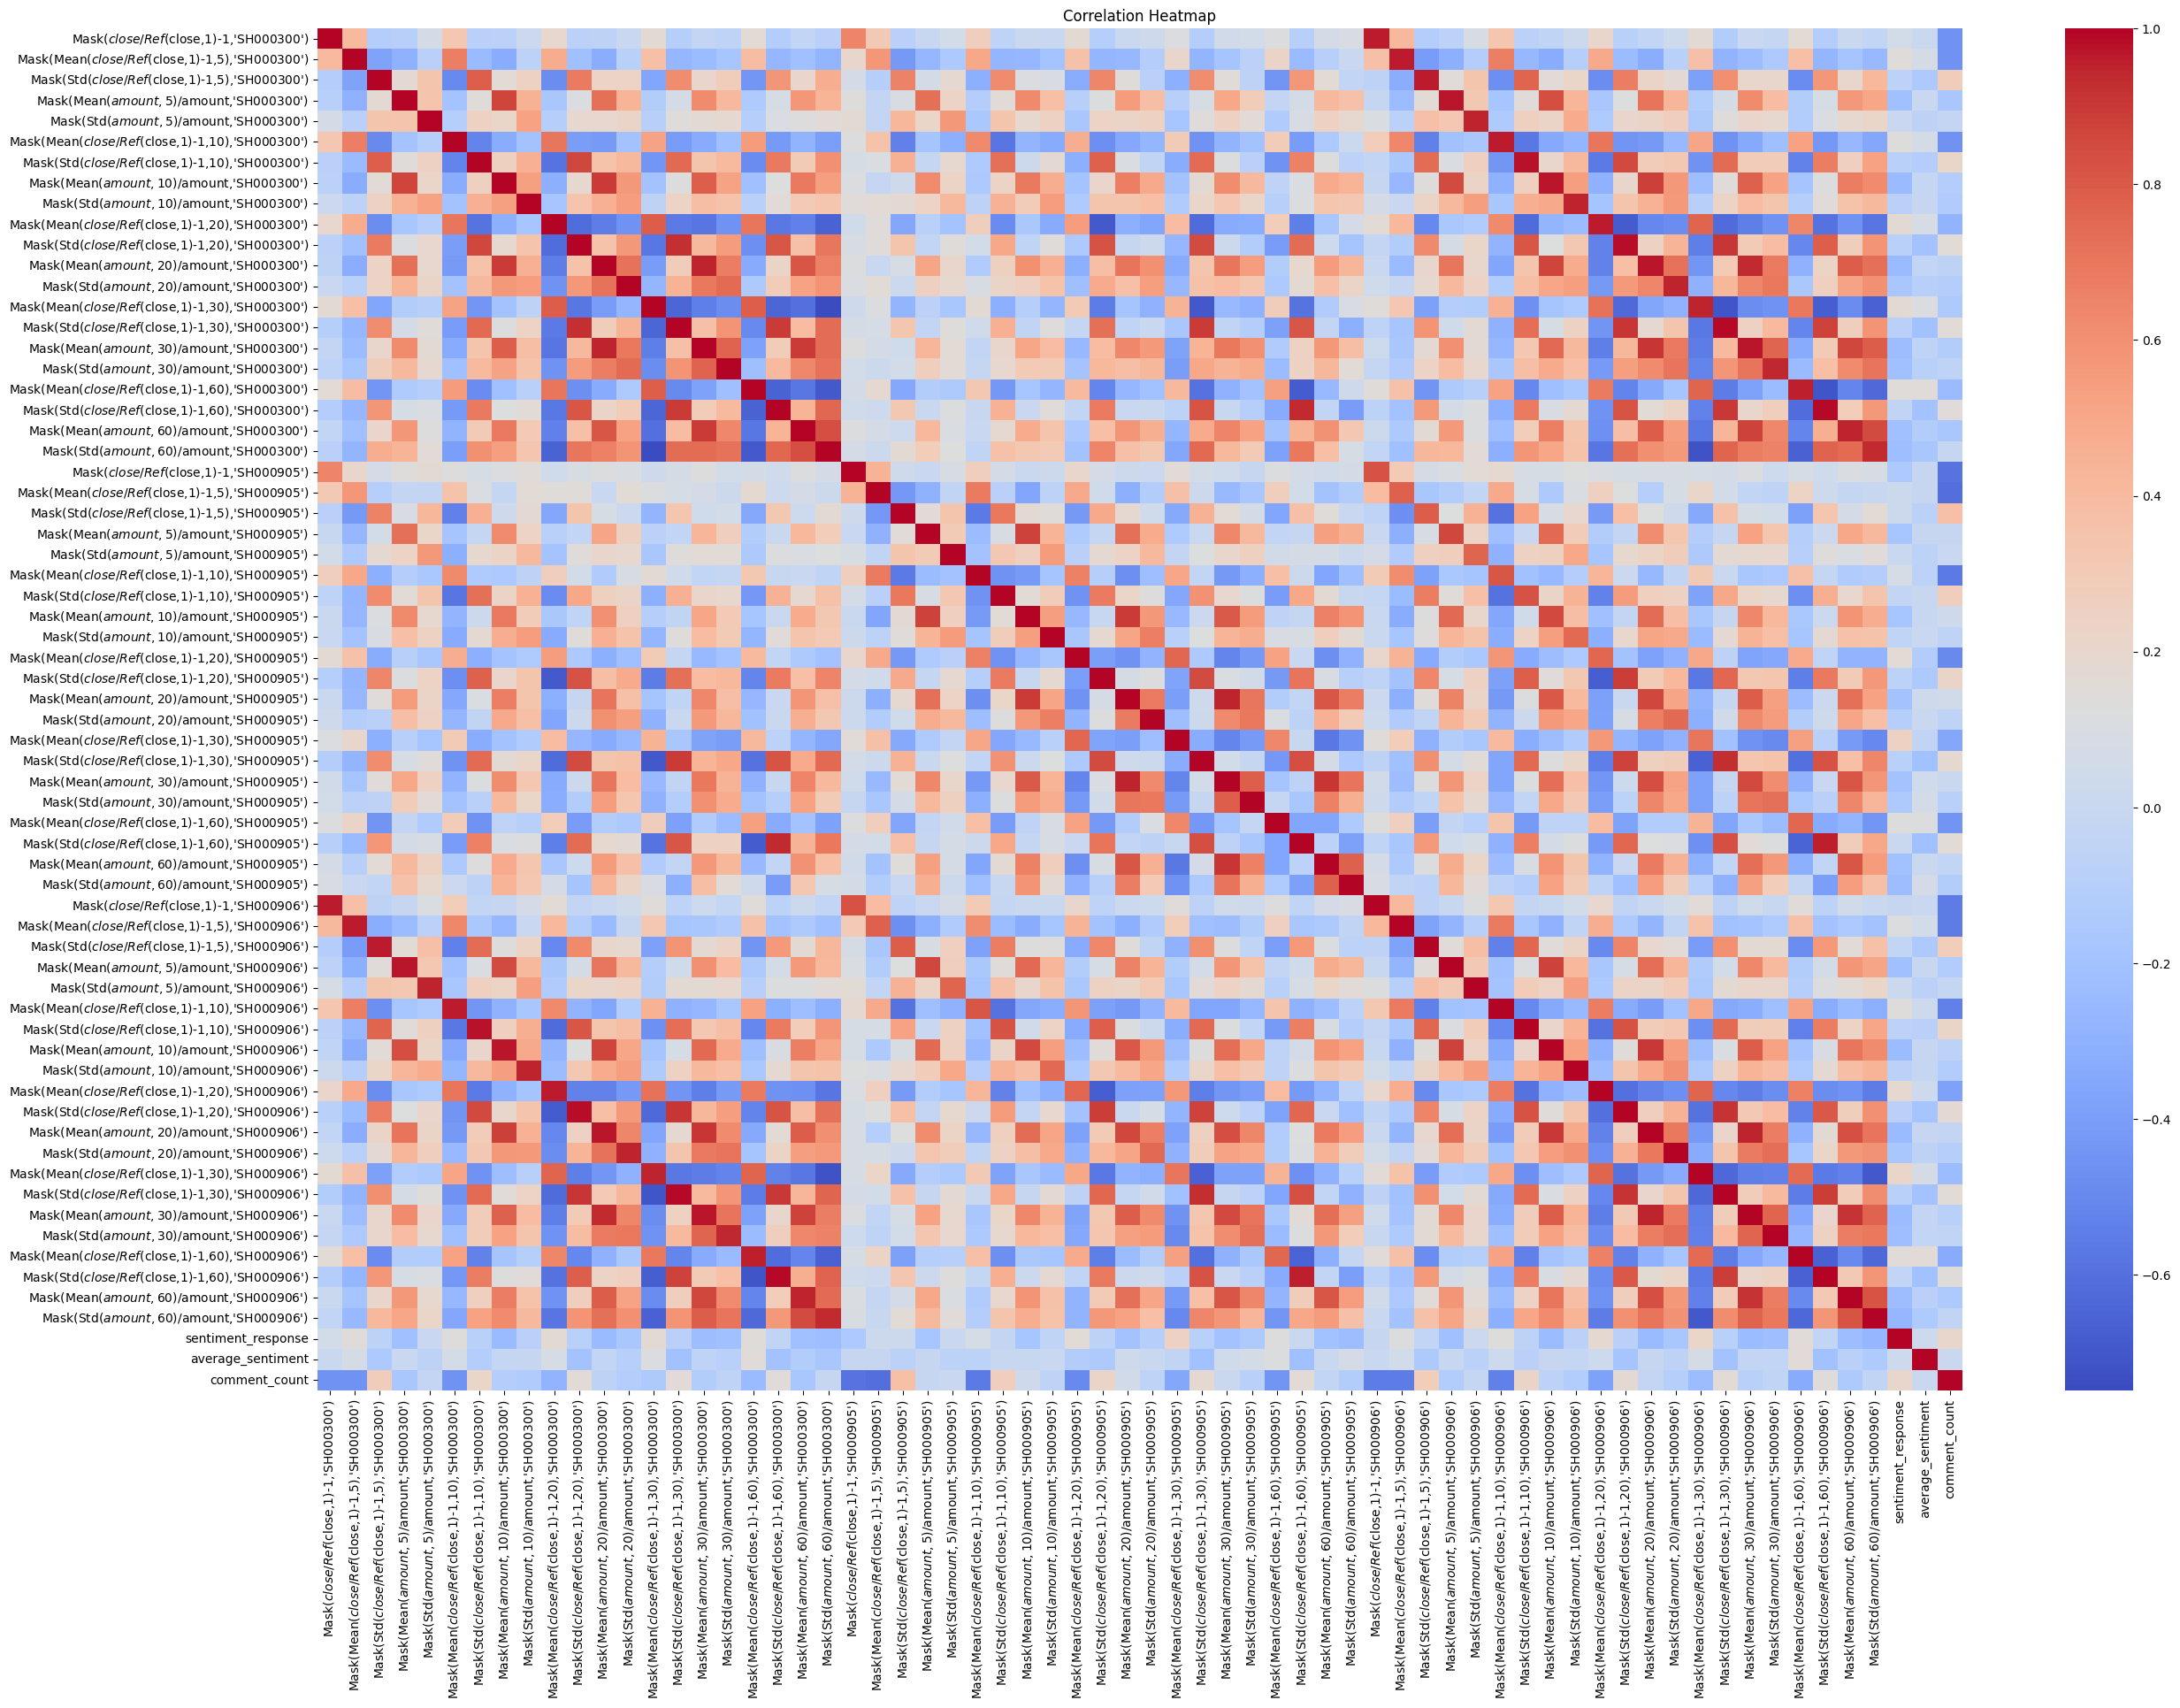

In [ ]:
import seaborn as sns
# 计算相关系数矩阵
correlation_matrix = overall.corr()
# 绘制相关系数热力图
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix,  cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

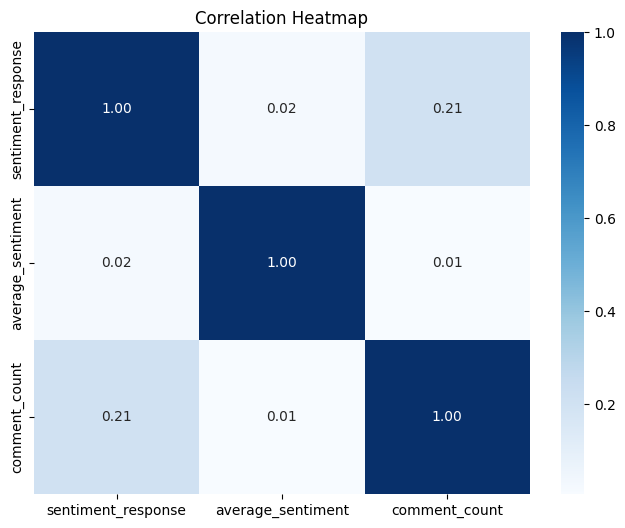

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
# 计算相关系数矩阵
correlation_matrix = overall[['sentiment_response','average_sentiment','comment_count']].corr()
# 绘制相关系数热力图
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix,  cmap='Blues', annot=True, fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()